## DS-301 Homework4
## Grace Yang
## gy654, N10610063

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Problem 1 - Hyperparametr Optimization using H2O
In this question, you will compare the performances of H2O's grid search and randomized grid search. You will use the H2ORandomForestEstimator model, and use the allyears2k_headers.zip dataset used in this link in the classification example. 

1. Grid search
(a) Perform grid search for identifying the best hyperparameters for the H2ORandomForestEstimator model with `ntrees`:[10, 30, 50, 100] and `max_depth`: [1,2,4,6]


In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 45 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=b6be2f753696c239081bb02ba19cb0d9b64af806ac7adf4343b1eb08e586f6a3
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

airlines= h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/airlines/allyears2k_headers.zip")

# convert columns to factors
airlines["Year"]= airlines["Year"].asfactor()
airlines["Month"]= airlines["Month"].asfactor()
airlines["DayOfWeek"] = airlines["DayOfWeek"].asfactor()
airlines["Cancelled"] = airlines["Cancelled"].asfactor()
airlines['FlightNum'] = airlines['FlightNum'].asfactor()

# set the predictor names and the response column name
x = ["Origin", "Dest", "Year", "UniqueCarrier", "DayOfWeek", "Month", "Distance", "FlightNum"]
y = "IsDepDelayed"

# split into train and validation sets
train, test = airlines.split_frame(ratios = [.8], seed = 1234)

hyper_parameters = { 'ntrees': [10, 30, 50, 100], 
                     'max_depth': [1, 2, 4, 6] }

model_grid_search = H2OGridSearch(H2ORandomForestEstimator(),
      hyper_parameters, 
      grid_id = "grid_search")
    
model_grid_search.train(x = x,y = y, training_frame = train)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpheqy46nu
  JVM stdout: /tmp/tmpheqy46nu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpheqy46nu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_qlxioj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,model_ids,logloss
,6.0,100.0,grid_search_model_16,0.6065216
,6.0,50.0,grid_search_model_12,0.6085237
,6.0,30.0,grid_search_model_8,0.6099793
,6.0,10.0,grid_search_model_4,0.6174366
,4.0,50.0,grid_search_model_11,0.6243598
,4.0,100.0,grid_search_model_15,0.6243773
,4.0,30.0,grid_search_model_7,0.6255471
,4.0,10.0,grid_search_model_3,0.6309482
,2.0,100.0,grid_search_model_14,0.6510525
,2.0,30.0,grid_search_model_6,0.6518734


(b). Display the grid results, sorted by accuracy in a decreasing order.

In [ ]:
model_grid_search_perf = model_grid_search.get_grid(sort_by = 'accuracy', decreasing = True)
model_grid_search_perf

,max_depth,ntrees,model_ids,accuracy
,6.0,100.0,grid_search_model_16,0.6810303
,6.0,50.0,grid_search_model_12,0.6793282
,6.0,30.0,grid_search_model_8,0.6763780
,6.0,10.0,grid_search_model_4,0.6722021
,4.0,100.0,grid_search_model_15,0.6675839
,4.0,50.0,grid_search_model_11,0.6650308
,4.0,30.0,grid_search_model_7,0.6623642
,4.0,10.0,grid_search_model_3,0.6531074
,2.0,100.0,grid_search_model_14,0.6454285
,2.0,50.0,grid_search_model_10,0.6429605


(c). Identify the best model and evaluate the model's performance on a test set and display the AUC score.

In [ ]:
best_rf = model_grid_search.models[0]
best_rf_perf = best_rf.model_performance(test)
best_auc = best_rf_perf.auc()
print(f'Thee AUC score for the best model is: {best_auc}')

Thee AUC score for the best model is: 0.7336032003243609


2. Randomized grid search

(a) Using the same model and hyperparameters grid, perform hypeparameter optimization using randomized grid search. Use a maximum of 10 models.

In [ ]:
search_criteria = { 'strategy': "RandomDiscrete",
                    'max_models': 10}

model_random_grid_search = H2OGridSearch(H2ORandomForestEstimator(),
                                         hyper_params = hyper_parameters, 
                                         search_criteria = search_criteria,
                                         grid_id = "random_grid_search")
     
model_random_grid_search.train(x = x,y = y, training_frame = train)              


drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,model_ids,logloss
,6.0,30.0,random_grid_search_model_6,0.6095716
,6.0,10.0,random_grid_search_model_9,0.6146741
,4.0,50.0,random_grid_search_model_8,0.6242528
,4.0,30.0,random_grid_search_model_3,0.6253643
,4.0,10.0,random_grid_search_model_5,0.6304063
,2.0,30.0,random_grid_search_model_10,0.6485767
,2.0,50.0,random_grid_search_model_1,0.6523339
,2.0,10.0,random_grid_search_model_2,0.6575115
,1.0,50.0,random_grid_search_model_4,0.6669002
,1.0,30.0,random_grid_search_model_7,0.6702545


(b). Display the results sorted by accuracy in a decreasing order.

In [ ]:
model_random_grid_search_perf = model_grid_search.get_grid(sort_by='accuracy', decreasing=True)
model_random_grid_search_perf

,max_depth,ntrees,model_ids,accuracy
,6.0,100.0,grid_search_model_16,0.6810303
,6.0,50.0,grid_search_model_12,0.6793282
,6.0,30.0,grid_search_model_8,0.6763780
,6.0,10.0,grid_search_model_4,0.6722021
,4.0,100.0,grid_search_model_15,0.6675839
,4.0,50.0,grid_search_model_11,0.6650308
,4.0,30.0,grid_search_model_7,0.6623642
,4.0,10.0,grid_search_model_3,0.6531074
,2.0,100.0,grid_search_model_14,0.6454285
,2.0,50.0,grid_search_model_10,0.6429605


(c). Identify the best model and evaluate the model's performance on a test set and display the auc score.

In [ ]:
best_random_rf = model_grid_search.models[0]
best_random_rf_perf = best_random_rf.model_performance(test)
best_auc_random = best_random_rf_perf.auc()
print(f'Thee AUC score for the best model is: {best_auc_random}')

Thee AUC score for the best model is: 0.7336032003243609


3. H2O AutoML

(a). Now using H2O's AutoML find the best deep learning model for the same classification task. Use H2OAutoML and test a maximum of 20 models to find the best performing model.

In [ ]:

aml = H2OAutoML(max_models = 20)
aml.train(x = x, y = y , training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20221120_25152

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1721243862963875
RMSE: 0.4148787609608227
LogLoss: 0.5189657644959396
AUC: 0.8308954018660307
AUCPR: 0.8483864502631264
Gini: 0.6617908037320615
Null degrees of freedom: 9789
Residual degrees of freedom: 9779
Null deviance: 13547.302762430447
Residual deviance: 10161.349668830495
AIC: 10183.349668830495

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4069863310398881
       NO    YES    Error    Rate
-----  ----  -----  -------  ---------------
NO     2616  2034   0.4374   (2034.0/4650.0)
YES    625   4515   0.1216   (625.0/5140.0)
Total  3241  6549   0.2716   (2659.0/9790.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.406986     0.772521  263
max f2                       0.246292     0.865757  337
max f0point5                 0.598907     0.77684   167
max accuracy                 0.510193     0.749132  213
max precision                0.992179     1         0
max recall                   0.104229     1         391
max specificity              0.992179     1         0
max absolute_mcc             0.510193     0.49678   213
max min_per_class_accuracy   0.521532     0.746237  207
max mean_per_class_accuracy  0.510193     0.748256  213
max tns                      0.992179     4650      0
max fns                      0.992179     5139      0
max fps                      0.0675743    4650      399
max tps                      0.104229     5140      391
max tnr                      0.992179     1         0
max fnr                      0.992179     0.999805  0
max fpr                      0.0675743    1         399
max tpr                      0.104229     1         391

Gains/Lift Table: Avg response rate: 52.50 %, avg score: 52.80 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100102                   0.936322           1.90467   1.90467            1                0.962299  1                           0.962299            0.0190661       0.0190661                  90.4669   90.4669            0.0190661
2        0.0200204                   0.917608           1.8658    1.88523            0.979592         0.927139  0.989796                    0.944719            0.018677        0.0377432                  86.5798   88.5234            0.0373131
3        0.0301328                   0.905863           1.86619   1.87884            0.979798         0.910565  0.986441                    0.933257            0.0188716       0.0566148                  86.6191   87.8843            0.0557546
4        0.0400409                   0.896688           1.82613   1.8658             0.958763         0.901718  0.979592                    0.925453            0.0180934       0.0747082                  82.6126   86.5798            0.0729877
5        0.0500511                   0.88486            1.82693   1.85802            0.959184         0.890769  0.97551                     0.918516            0.0182879       0.0929961                  82.6928   85.8024            0.0904155
6        0.1                         0.830077           1.82287   1.84047            0.957055         0.857366  0.966292                    0.887972            0.0910506       0.184047                   82.287

(b). Display the leaderboard, and identify the best performing model using it and print its parameters.

In [ ]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_3_20221120_25152,0.756094,0.585709,0.768757,0.342195,0.447697,0.200432
StackedEnsemble_BestOfFamily_1_AutoML_3_20221120_25152,0.755418,0.586306,0.767671,0.354179,0.447969,0.200676
GBM_1_AutoML_3_20221120_25152,0.752534,0.589437,0.763505,0.344497,0.449295,0.201866
GBM_3_AutoML_3_20221120_25152,0.749325,0.592328,0.758887,0.352627,0.450601,0.203041
GBM_2_AutoML_3_20221120_25152,0.748047,0.593362,0.758274,0.349598,0.451097,0.203488
GBM_4_AutoML_3_20221120_25152,0.747632,0.594887,0.756491,0.352943,0.45167,0.204006
GBM_5_AutoML_3_20221120_25152,0.74679,0.594242,0.757217,0.358965,0.451577,0.203922
XGBoost_grid_1_AutoML_3_20221120_25152_model_1,0.744696,0.596862,0.757333,0.350103,0.453022,0.205229
XGBoost_grid_1_AutoML_3_20221120_25152_model_3,0.744134,0.596165,0.759318,0.356924,0.452706,0.204942
GBM_grid_1_AutoML_3_20221120_25152_model_1,0.743462,0.597825,0.753086,0.350296,0.453167,0.205361


(c). Display the AUC score of the best model for the test set.

In [ ]:
perf = aml.leader.model_performance(test)
perf.auc()

0.7606212811475869

(d). Identify the best XGBoost model among all the models tested ranked by log loss as the criteria

In [ ]:
xgb = aml.get_best_model(algorithm = "xgboost", criterion = "logloss")
xgb

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20221120_25152_model_3


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.18756679520993857
RMSE: 0.43308982348923714
LogLoss: 0.5548375605555976
Mean Per-Class Error: 0.2990957313400502
AUC: 0.7900078636546631
AUCPR: 0.8045096133471471
Gini: 0.5800157273093263

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4277573281212857
       NO     YES    Error    Rate
-----  -----  -----  -------  -----------------
NO     9621   7145   0.4262   (7145.0/16766.0)
YES    3180   15305  0.172    (3180.0/18485.0)
Total  12801  22450  0.2929   (10325.0/35251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.427757     0.747771  249
max f2                       0.246509     0.854213  334
max f0point5                 0.581999     0.739683  171
max accuracy                 0.487173     0.717256  217
max precision                0.986476     1         0
max recall                   0.0611261    1         397
max specificity              0.986476     1         0
max absolute_mcc             0.513224     0.433185  204
max min_per_class_accuracy   0.513224     0.715317  204
max mean_per_class_accuracy  0.513224     0.716787  204
max tns                      0.986476     16766     0
max fns                      0.986476     18434     0
max fps                      0.0464961    16766     399
max tps                      0.0611261    18485     397
max tnr                      0.986476     1         0
max fnr                      0.986476     0.997241  0
max fpr                      0.0464961    1         399
max tpr                      0.0611261    1         397

Gains/Lift Table: Avg response rate: 52.44 %, avg score: 52.47 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100423                   0.945382           1.89084   1.89084            0.991525         0.9637    0.991525                    0.9637              0.0189884       0.0189884                  89.0845   89.0845            0.0188094
2        0.0200278                   0.928978           1.83116   1.86109            0.960227         0.936891  0.975921                    0.950334            0.0182851       0.0372735                  83.1159   86.1086            0.0362595
3        0.0301268                   0.914973           1.8213    1.84775            0.955056         0.921001  0.968927                    0.940501            0.0183933       0.0556668                  82.1298   84.7748            0.0536985
4        0.0400272                   0.90145            1.77586   1.82997            0.931232         0.907533  0.959603                    0.932347            0.0175818       0.0732486                  77.5865   82.9969            0.0698488
5        0.0500411                   0.889542           1.74494   1.81295            0.915014         0.89554   0.95068                     0.924981            0.0174736       0.0907222                  74.4937   81.2953            0.0855331
6        0.100082                    0.825466           1.70376   1.75836            0.893424         0.855036  0.922052                    0.890009            0.0852583       0.175981                   70.3765   75.8359            0.159578
7        0.150095                    0.779309           1.62036   

## Problem2 - Automated Feature Engineering

In the lab, we looked at AutoFeat (`https://github.com/cod3licious/autofeat`), a python library that automatically does feature engineering and selection for you.

1. Explain the importance of interpretability when training machine learning models. Why is model explainability necessary?

The growing complexity of machine learning algorithms limits the ability tounderstand what the model has learned or why a given prediction was made, acting as a barrier to the adoption of machine learning. Model explainability helps us better understand which feature does the model consider important and what is the relationship between the features and target. Model interpretability also help us improve the quality of the model. We can see if the model learns unexpected or spurious features from the data or if it fails to generalize to unseen data. 

2. Perform feature selection for the Diabetes regression dataset, using FeatureSelector(). How many features are discarded?

In [ ]:
! pip install autofeat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 11.5 MB/s 


In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from autofeat import FeatureSelector, AutoFeatRegressor


In [ ]:
features, target = load_diabetes(return_X_y = True)
fsel = FeatureSelector(verbose=1)
new_features = fsel.fit_transform(pd.DataFrame(features, columns= [str(i) for i in range(features.shape[1])]), target)
print(new_features.columns)
num_discarded = features.shape[1] - len(new_features.columns)
print(f'{num_discarded} features are discarded.')

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 7 features after 5 feature selection runs
[featsel] 7 features after correlation filtering
[featsel] 5 features after noise filtering
Index(['3', '1', '2', '8', '6'], dtype='object')
5 features are discarded.


3. Perform a train-test split on your dataset. Select a regression model from SKLarn and fit it to the training dataset. What is the $R^2$ score on the training and test set?

In [ ]:
from sklearn.linear_model import LinearRegression
df_org = pd.DataFrame(features, columns=[str(i) for i in range(features.shape[1])])
X_train, X_test, y_train, y_test = train_test_split(df_org, target, test_size=0.2, random_state=42)

lr = LinearRegression()
df = lr.fit_transform(X_train, y_train)
r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)
print("## Final Train R^2: %.4f" % r2_train)
print("## Final Test R^2: %.4f" % r2_test)

## Final Train R^2: 0.5535
## Final Test R^2: 0.5132


4. Keeping the train and test dataset same, run 3 feature engineering steps using AutoFeatRegressor(). What is the R2 score on the training and test set now? Mention any five new features generated by the output of AutoFeatRegressor().

In [ ]:
afreg = AutoFeatRegressor(verbose=0, feateng_steps=3)
df = afreg.fit_transform(X_train, y_train)
r2_train = afreg.score(X_train, y_train)
r2_test = afreg.score(X_test, y_test)
print("## Final Train R^2: %.4f" % r2_train)
print("## Final Test R^2: %.4f" % r2_test)
print(f'new features: {afreg.new_feat_cols_[:5]}')

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


## Final Train R^2: 0.6030
## Final Test R^2: 0.5459
new features: ['Abs(x8)/x8', 'exp(x2)*exp(x3)', 'exp(x2)*exp(x8)', 'exp(x6)*Abs(x1)', 'x0**3*x1']


## Problem3 - Ray Tune for Hyperparameter Optimization

In this problem, we will compare the performance of Grid Search, Bayesian Search and Hyperband for hyperparameter optimization fir a deep learning problem using Ray Tune. We will use the MNIST dataset alongwith the Lenet model. The hyperparameters to tune are:

- Number of filters in the first Conv2d layer: 64 to 256
- Learning Rate: 0.001 to 0.1
- Batch Size: 64, 128, 256
- Dropout: probability between 0 and 1

Use Ray Tune for the search. You can use the same resources per trial and metric as those in Lab 8 and Lab 10 in class.

1. Perform Grid Search, Bayesian Search and Hyperband for the given hyperparameter configurations, For Grid Search, you can either sample uniformly beween the given ranges, or specify a list of values in the given range. (for eg. filters = [64, 128, 256], lr = [0.001, 0.01, 0.1], etc).



In [ ]:
! pip install -U "ray[tune]==1.11.0"
! pip install bayesian-optimization==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.4 MB 101 kB/s 
     |████████████████████████████████| 248 kB 62.9 MB/s 
     |████████████████████████████████| 4.1 MB 35.0 MB/s 
     |████████████████████████████████| 125 kB 12.5 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.50.0
    Uninstalling grpcio-1.50.0:
      Successfully uninstalled grpcio-1.50.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.48.2 requires grpcio>=1.48.2, but you have grpcio 1.43.0 which is incompatible.
google-cloud-bigquery 3.3.6 requires grpcio<2.0dev,>=1.47.0, but you have grpcio 1.43.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-opti

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import ray
from ray import tune
from ray.tune.integration.keras import TuneReportCallback
from ray.tune.schedulers import HyperBandScheduler
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.suggest import ConcurrencyLimiter
import time

In [ ]:
def train_mnist(config):
    num_classes = 10
    epochs = 12
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(round(config['filters']), 3, activation='tanh', input_shape=(28,28,1)),
        tf.keras.layers.AveragePooling2D(2),
        tf.keras.layers.Conv2D(16, 3, activation='tanh'),
        tf.keras.layers.AveragePooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation="tanh"),
        tf.keras.layers.Dropout(config["dropout"]),
        tf.keras.layers.Dense(84, activation="tanh"),
        tf.keras.layers.Dropout(config["dropout"]),
        tf.keras.layers.Dense(10, activation="softmax"),
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])


    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(
            lr=config["lr"]),
        metrics=["accuracy"])

    model.fit(
        x_train,
        y_train,
        batch_size= round(config['batch_size']),
        epochs=epochs,
        verbose=0,
        validation_data=(x_test, y_test),
        callbacks=[TuneReportCallback({
            "mean_accuracy": "accuracy"
        })])


def grid_search(config):
  grid_search_analysis = tune.run(
          train_mnist,
          name="exp",
          metric="mean_accuracy",
          mode="max",
          resources_per_trial={
              "gpu": 1,
              "cpu": 2
          },
          config = config,
          num_samples=10
  )
  return grid_search_analysis

In [ ]:
def bayesian_search(config):
  search_alg = BayesOptSearch()
  bayesian_analysis = tune.run(
      train_mnist,
      resources_per_trial={
              "gpu": 1,
              "cpu": 2
          },
      config= config,
      metric = "mean_accuracy",
      mode="max",
      search_alg = search_alg, 
      num_samples=10)
  return bayesian_analysis



In [ ]:
def hyperband_search(config):
  hyperband_scheduler = HyperBandScheduler(
      time_attr = 'training_iteration',
      metric = 'mean_accuracy',
      mode = 'max',
      max_t = 10,
      reduction_factor=3)

  hyperband_analysis = tune.run(
          train_mnist,
          name="exp",
          resources_per_trial={
              "gpu": 1,
              "cpu": 2
          },
          config = config,
          num_samples=10,
          scheduler = hyperband_scheduler)
  return hyperband_analysis

In [ ]:


config = {
    "filters": tune.uniform(64, 256),
    "lr": tune.uniform(0.001,0.1),
    'batch_size': tune.uniform(64, 256),
    "dropout": tune.uniform(0, 1)
}


In [ ]:
import time
t0 = time.time()
grid_search_analysis = grid_search(config)
t1 = time.time()
delta1 = t1 - t0
print(delta1)


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_c345d_00000,PENDING,,69.7556,0.855449,229.864,0.0770108
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161


(train_mnist pid=4639) 2022-12-03 20:55:11.435572: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4639) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4639)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-55-23
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10311666876077652
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 14.451781034469604
  time_this_iter_s: 14.451781034469604
  time_total_s: 14.451781034469604
  timestamp: 1670100923
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103117,1,14.4518
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-55-29
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 2
  mean_accuracy: 0.10204999893903732
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 20.446083545684814
  time_this_iter_s: 5.99430251121521
  time_total_s: 20.446083545684814
  timestamp: 1670100929
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.10205,2,20.4461
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-55-36
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10366666316986084
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 26.580089330673218
  time_this_iter_s: 6.134005784988403
  time_total_s: 26.580089330673218
  timestamp: 1670100936
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103667,3,26.5801
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-55-41
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 4
  mean_accuracy: 0.10376666486263275
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 32.46873116493225
  time_this_iter_s: 5.888641834259033
  time_total_s: 32.46873116493225
  timestamp: 1670100941
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103767,4,32.4687
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103767,4,32.4687
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-55-47
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10168333351612091
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 38.51883792877197
  time_this_iter_s: 6.050106763839722
  time_total_s: 38.51883792877197
  timestamp: 1670100947
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.101683,5,38.5188
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-55-53
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 6
  mean_accuracy: 0.10076666623353958
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 44.48647928237915
  time_this_iter_s: 5.967641353607178
  time_total_s: 44.48647928237915
  timestamp: 1670100953
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.100767,6,44.4865
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-55-59
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10315000265836716
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 50.49360704421997
  time_this_iter_s: 6.00712776184082
  time_total_s: 50.49360704421997
  timestamp: 1670100959
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.10315,7,50.4936
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-56-05
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 8
  mean_accuracy: 0.10294999927282333
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 56.537028551101685
  time_this_iter_s: 6.043421506881714
  time_total_s: 56.537028551101685
  timestamp: 1670100965
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.10295,8,56.537
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-56-12
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10376666486263275
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 63.281182527542114
  time_this_iter_s: 6.74415397644043
  time_total_s: 63.281182527542114
  timestamp: 1670100972
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103767,9,63.2812
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-56-18
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.10526666790246964
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 69.21353769302368
  time_this_iter_s: 5.932355165481567
  time_total_s: 69.21353769302368
  timestamp: 1670100978
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.105267,10,69.2135
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-56-24
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.1046166643500328
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 75.08429002761841
  time_this_iter_s: 5.870752334594727
  time_total_s: 75.08429002761841
  timestamp: 1670100984
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,RUNNING,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.104617,11,75.0843
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,


Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-56-31
  done: false
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10383333265781403
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 81.9062602519989
  time_this_iter_s: 6.821970224380493
  time_total_s: 81.9062602519989
  timestamp: 1670100991
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00000
  
Result for train_mnist_c345d_00000:
  date: 2022-12-03_20-56-31
  done: true
  experiment_id: 5fcb739b76f6401cb0481cc4a4a15410
  experiment_tag: 0_batch_size=69.756,dropout=0.85545,filters=229.86,lr=0.077011
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10383333265781403
  node_ip: 172.28.0.12
  pid: 4639
  time_since_restore: 81.9062602519989
  time_this_iter_s: 6.821970224380493
  time_total_s: 81.9062602519989
  timestamp: 1670100991
  timesteps_since_restore: 0
  training_iteration: 12
  tri

Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,PENDING,,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


(train_mnist pid=4795) 2022-12-03 20:56:39.826016: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4795) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4795)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,,,
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Result for train_mnist_c345d_00001:
  date: 2022-12-03_20-56-46
  done: false
  experiment_id: 77a8982656964a20a31966c780050457
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10451667010784149
  node_ip: 172.28.0.12
  pid: 4795
  time_since_restore: 8.922149896621704
  time_this_iter_s: 8.922149896621704
  time_total_s: 8.922149896621704
  timestamp: 1670101006
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.104517,1,8.92215
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.10445,2,12.6929
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Result for train_mnist_c345d_00001:
  date: 2022-12-03_20-56-54
  done: false
  experiment_id: 77a8982656964a20a31966c780050457
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10406666994094849
  node_ip: 172.28.0.12
  pid: 4795
  time_since_restore: 16.72131872177124
  time_this_iter_s: 4.028462648391724
  time_total_s: 16.72131872177124
  timestamp: 1670101014
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.104833,4,20.7493
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Result for train_mnist_c345d_00001:
  date: 2022-12-03_20-57-02
  done: false
  experiment_id: 77a8982656964a20a31966c780050457
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10463333129882812
  node_ip: 172.28.0.12
  pid: 4795
  time_since_restore: 24.776871919631958
  time_this_iter_s: 4.027604103088379
  time_total_s: 24.776871919631958
  timestamp: 1670101022
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.104633,5,24.7769
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.104767,6,28.5913
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Result for train_mnist_c345d_00001:
  date: 2022-12-03_20-57-10
  done: false
  experiment_id: 77a8982656964a20a31966c780050457
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10253333300352097
  node_ip: 172.28.0.12
  pid: 4795
  time_since_restore: 32.75934839248657
  time_this_iter_s: 4.1680402755737305
  time_total_s: 32.75934839248657
  timestamp: 1670101030
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.102733,8,36.531
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Result for train_mnist_c345d_00001:
  date: 2022-12-03_20-57-18
  done: false
  experiment_id: 77a8982656964a20a31966c780050457
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10278332978487015
  node_ip: 172.28.0.12
  pid: 4795
  time_since_restore: 40.29940891265869
  time_this_iter_s: 3.7684385776519775
  time_total_s: 40.29940891265869
  timestamp: 1670101038
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.104117,10,44.0535
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Result for train_mnist_c345d_00001:
  date: 2022-12-03_20-57-26
  done: false
  experiment_id: 77a8982656964a20a31966c780050457
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10414999723434448
  node_ip: 172.28.0.12
  pid: 4795
  time_since_restore: 48.07606911659241
  time_this_iter_s: 4.02260422706604
  time_total_s: 48.07606911659241
  timestamp: 1670101046
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.10415,11,48.0761
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00001,RUNNING,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063


Result for train_mnist_c345d_00001:
  date: 2022-12-03_20-57-29
  done: true
  experiment_id: 77a8982656964a20a31966c780050457
  experiment_tag: 1_batch_size=78.458,dropout=0.22631,filters=103.45,lr=0.056667
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10331666469573975
  node_ip: 172.28.0.12
  pid: 4795
  time_since_restore: 51.87102484703064
  time_this_iter_s: 3.7949557304382324
  time_total_s: 51.87102484703064
  timestamp: 1670101049
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,PENDING,,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


(train_mnist pid=4947) 2022-12-03 20:58:10.656266: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4947) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4947)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,,,
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-58-19
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10258333384990692
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 10.927132606506348
  time_this_iter_s: 10.927132606506348
  time_total_s: 10.927132606506348
  timestamp: 1670101099
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.102583,1,10.9271
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-58-25
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 2
  mean_accuracy: 0.10356666892766953
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 16.739699840545654
  time_this_iter_s: 5.812567234039307
  time_total_s: 16.739699840545654
  timestamp: 1670101105
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.103567,2,16.7397
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-58-31
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10518333315849304
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 22.42099356651306
  time_this_iter_s: 5.681293725967407
  time_total_s: 22.42099356651306
  timestamp: 1670101111
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.105183,3,22.421
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-58-36
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 4
  mean_accuracy: 0.10321666300296783
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 28.096295595169067
  time_this_iter_s: 5.675302028656006
  time_total_s: 28.096295595169067
  timestamp: 1670101116
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.103217,4,28.0963
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-58-42
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10050000250339508
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 33.799869537353516
  time_this_iter_s: 5.703573942184448
  time_total_s: 33.799869537353516
  timestamp: 1670101122
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1005,5,33.7999
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-58-48
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 6
  mean_accuracy: 0.10384999960660934
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 39.47912812232971
  time_this_iter_s: 5.679258584976196
  time_total_s: 39.47912812232971
  timestamp: 1670101128
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.10385,6,39.4791
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-58-54
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10436666756868362
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 45.51532006263733
  time_this_iter_s: 6.036191940307617
  time_total_s: 45.51532006263733
  timestamp: 1670101134
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.104367,7,45.5153
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-59-00
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 8
  mean_accuracy: 0.10161666572093964
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 51.55654454231262
  time_this_iter_s: 6.041224479675293
  time_total_s: 51.55654454231262
  timestamp: 1670101140
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.101617,8,51.5565
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-59-06
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10360000282526016
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 57.35834097862244
  time_this_iter_s: 5.8017964363098145
  time_total_s: 57.35834097862244
  timestamp: 1670101146
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1036,9,57.3583
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-59-11
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.10388333350419998
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 63.18538045883179
  time_this_iter_s: 5.827039480209351
  time_total_s: 63.18538045883179
  timestamp: 1670101151
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.103883,10,63.1854
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-59-17
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10239999741315842
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 68.86992716789246
  time_this_iter_s: 5.684546709060669
  time_total_s: 68.86992716789246
  timestamp: 1670101157
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1024,11,68.8699
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-59-23
  done: false
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10320000350475311
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 74.56272149085999
  time_this_iter_s: 5.692794322967529
  time_total_s: 74.56272149085999
  timestamp: 1670101163
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00002,RUNNING,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871


Result for train_mnist_c345d_00002:
  date: 2022-12-03_20-59-23
  done: true
  experiment_id: 6203515e989b48a997c2a29c25e119fd
  experiment_tag: 2_batch_size=87.804,dropout=0.44583,filters=250.37,lr=0.090376
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10320000350475311
  node_ip: 172.28.0.12
  pid: 4947
  time_since_restore: 74.56272149085999
  time_this_iter_s: 5.692794322967529
  time_total_s: 74.56272149085999
  timestamp: 1670101163
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,PENDING,,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


(train_mnist pid=5099) 2022-12-03 20:59:41.999235: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=5099) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=5099)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,,,
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Result for train_mnist_c345d_00003:
  date: 2022-12-03_20-59-48
  done: false
  experiment_id: ad9b64300ed54d6d999e34b398f78298
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10620000213384628
  node_ip: 172.28.0.12
  pid: 5099
  time_since_restore: 8.7338285446167
  time_this_iter_s: 8.7338285446167
  time_total_s: 8.7338285446167
  timestamp: 1670101188
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.1062,1,8.73383
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Result for train_mnist_c345d_00003:
  date: 2022-12-03_20-59-56
  done: false
  experiment_id: ad9b64300ed54d6d999e34b398f78298
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.1076333299279213
  node_ip: 172.28.0.12
  pid: 5099
  time_since_restore: 16.076441764831543
  time_this_iter_s: 3.793818950653076
  time_total_s: 16.076441764831543
  timestamp: 1670101196
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.107633,3,16.0764
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.107833,4,19.8937
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Result for train_mnist_c345d_00003:
  date: 2022-12-03_21-00-03
  done: false
  experiment_id: ad9b64300ed54d6d999e34b398f78298
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10869999974966049
  node_ip: 172.28.0.12
  pid: 5099
  time_since_restore: 23.426214694976807
  time_this_iter_s: 3.53246808052063
  time_total_s: 23.426214694976807
  timestamp: 1670101203
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.10925,6,26.959
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Result for train_mnist_c345d_00003:
  date: 2022-12-03_21-00-10
  done: false
  experiment_id: ad9b64300ed54d6d999e34b398f78298
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10570000112056732
  node_ip: 172.28.0.12
  pid: 5099
  time_since_restore: 30.76097798347473
  time_this_iter_s: 3.8020071983337402
  time_total_s: 30.76097798347473
  timestamp: 1670101210
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.1057,7,30.761
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Result for train_mnist_c345d_00003:
  date: 2022-12-03_21-00-17
  done: false
  experiment_id: ad9b64300ed54d6d999e34b398f78298
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10869999974966049
  node_ip: 172.28.0.12
  pid: 5099
  time_since_restore: 37.84400677680969
  time_this_iter_s: 3.5304834842681885
  time_total_s: 37.84400677680969
  timestamp: 1670101217
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.1087,9,37.844
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.107,10,41.4121
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Result for train_mnist_c345d_00003:
  date: 2022-12-03_21-00-25
  done: false
  experiment_id: ad9b64300ed54d6d999e34b398f78298
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10580000281333923
  node_ip: 172.28.0.12
  pid: 5099
  time_since_restore: 44.9139678478241
  time_this_iter_s: 3.5018653869628906
  time_total_s: 44.9139678478241
  timestamp: 1670101225
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00003,RUNNING,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627


Result for train_mnist_c345d_00003:
  date: 2022-12-03_21-00-28
  done: true
  experiment_id: ad9b64300ed54d6d999e34b398f78298
  experiment_tag: 3_batch_size=85.54,dropout=0.81082,filters=97.468,lr=0.016685
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10641666501760483
  node_ip: 172.28.0.12
  pid: 5099
  time_since_restore: 48.70196866989136
  time_this_iter_s: 3.7880008220672607
  time_total_s: 48.70196866989136
  timestamp: 1670101228
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,PENDING,,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


(train_mnist pid=5256) 2022-12-03 21:01:12.649876: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=5256) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=5256)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,,,
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Result for train_mnist_c345d_00004:
  date: 2022-12-03_21-01-20
  done: false
  experiment_id: 376fbb1fe9844964afd7d4b007a49854
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10201666504144669
  node_ip: 172.28.0.12
  pid: 5256
  time_since_restore: 9.318928241729736
  time_this_iter_s: 9.318928241729736
  time_total_s: 9.318928241729736
  timestamp: 1670101280
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102017,1,9.31893
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.100733,2,13.6399
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Result for train_mnist_c345d_00004:
  date: 2022-12-03_21-01-28
  done: false
  experiment_id: 376fbb1fe9844964afd7d4b007a49854
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10153333097696304
  node_ip: 172.28.0.12
  pid: 5256
  time_since_restore: 17.673219919204712
  time_this_iter_s: 4.033297300338745
  time_total_s: 17.673219919204712
  timestamp: 1670101288
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.101533,3,17.6732
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Result for train_mnist_c345d_00004:
  date: 2022-12-03_21-01-36
  done: false
  experiment_id: 376fbb1fe9844964afd7d4b007a49854
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10141666978597641
  node_ip: 172.28.0.12
  pid: 5256
  time_since_restore: 25.695748329162598
  time_this_iter_s: 3.9955499172210693
  time_total_s: 25.695748329162598
  timestamp: 1670101296
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.101417,5,25.6957
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.103767,6,30.3852
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Result for train_mnist_c345d_00004:
  date: 2022-12-03_21-01-45
  done: false
  experiment_id: 376fbb1fe9844964afd7d4b007a49854
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10171666741371155
  node_ip: 172.28.0.12
  pid: 5256
  time_since_restore: 34.53530430793762
  time_this_iter_s: 4.150142431259155
  time_total_s: 34.53530430793762
  timestamp: 1670101305
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.101717,7,34.5353
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.104417,8,38.5627
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Result for train_mnist_c345d_00004:
  date: 2022-12-03_21-01-53
  done: false
  experiment_id: 376fbb1fe9844964afd7d4b007a49854
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10350000113248825
  node_ip: 172.28.0.12
  pid: 5256
  time_since_restore: 42.90186786651611
  time_this_iter_s: 4.339118957519531
  time_total_s: 42.90186786651611
  timestamp: 1670101313
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.1035,9,42.9019
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Result for train_mnist_c345d_00004:
  date: 2022-12-03_21-02-02
  done: false
  experiment_id: 376fbb1fe9844964afd7d4b007a49854
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10166666656732559
  node_ip: 172.28.0.12
  pid: 5256
  time_since_restore: 51.25594139099121
  time_this_iter_s: 4.322791814804077
  time_total_s: 51.25594139099121
  timestamp: 1670101322
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.101667,11,51.2559
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00004,RUNNING,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702


Result for train_mnist_c345d_00004:
  date: 2022-12-03_21-02-06
  done: true
  experiment_id: 376fbb1fe9844964afd7d4b007a49854
  experiment_tag: 4_batch_size=137.27,dropout=0.91869,filters=172.51,lr=0.081156
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10213333368301392
  node_ip: 172.28.0.12
  pid: 5256
  time_since_restore: 55.581416606903076
  time_this_iter_s: 4.325475215911865
  time_total_s: 55.581416606903076
  timestamp: 1670101326
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,PENDING,,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


(train_mnist pid=5404) 2022-12-03 21:02:43.990764: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=5404) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=5404)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,,,
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Result for train_mnist_c345d_00005:
  date: 2022-12-03_21-02-50
  done: false
  experiment_id: aaf0f86163634722a7af83f73079ebbd
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10208333283662796
  node_ip: 172.28.0.12
  pid: 5404
  time_since_restore: 8.304781913757324
  time_this_iter_s: 8.304781913757324
  time_total_s: 8.304781913757324
  timestamp: 1670101370
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.102267,2,11.3449
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Result for train_mnist_c345d_00005:
  date: 2022-12-03_21-02-56
  done: false
  experiment_id: aaf0f86163634722a7af83f73079ebbd
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10450000315904617
  node_ip: 172.28.0.12
  pid: 5404
  time_since_restore: 14.378577470779419
  time_this_iter_s: 3.0336523056030273
  time_total_s: 14.378577470779419
  timestamp: 1670101376
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.103717,4,17.3682
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Result for train_mnist_c345d_00005:
  date: 2022-12-03_21-03-02
  done: false
  experiment_id: aaf0f86163634722a7af83f73079ebbd
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.1028333306312561
  node_ip: 172.28.0.12
  pid: 5404
  time_since_restore: 20.32725977897644
  time_this_iter_s: 2.9590303897857666
  time_total_s: 20.32725977897644
  timestamp: 1670101382
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.103667,6,23.2848
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Result for train_mnist_c345d_00005:
  date: 2022-12-03_21-03-08
  done: false
  experiment_id: aaf0f86163634722a7af83f73079ebbd
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10306666791439056
  node_ip: 172.28.0.12
  pid: 5404
  time_since_restore: 26.235421180725098
  time_this_iter_s: 2.9505906105041504
  time_total_s: 26.235421180725098
  timestamp: 1670101388
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.104417,8,29.1778
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Result for train_mnist_c345d_00005:
  date: 2022-12-03_21-03-14
  done: false
  experiment_id: aaf0f86163634722a7af83f73079ebbd
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10376666486263275
  node_ip: 172.28.0.12
  pid: 5404
  time_since_restore: 32.13445162773132
  time_this_iter_s: 2.95664119720459
  time_total_s: 32.13445162773132
  timestamp: 1670101394
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.104117,10,35.1038
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Result for train_mnist_c345d_00005:
  date: 2022-12-03_21-03-20
  done: false
  experiment_id: aaf0f86163634722a7af83f73079ebbd
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10438333451747894
  node_ip: 172.28.0.12
  pid: 5404
  time_since_restore: 38.13183641433716
  time_this_iter_s: 3.0280001163482666
  time_total_s: 38.13183641433716
  timestamp: 1670101400
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00005,RUNNING,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.104383,11,38.1318
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814


Result for train_mnist_c345d_00005:
  date: 2022-12-03_21-03-23
  done: true
  experiment_id: aaf0f86163634722a7af83f73079ebbd
  experiment_tag: 5_batch_size=238.49,dropout=0.55835,filters=131.74,lr=0.091015
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.1039000004529953
  node_ip: 172.28.0.12
  pid: 5404
  time_since_restore: 41.168113231658936
  time_this_iter_s: 3.0362768173217773
  time_total_s: 41.168113231658936
  timestamp: 1670101403
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00006,PENDING,,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681


(train_mnist pid=5539) 2022-12-03 21:03:31.680822: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=5539) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=5539)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00006,RUNNING,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,,,
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681


Result for train_mnist_c345d_00006:
  date: 2022-12-03_21-03-37
  done: false
  experiment_id: 6745fe6e873846f49f8991c144234219
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.5156499743461609
  node_ip: 172.28.0.12
  pid: 5539
  time_since_restore: 7.527647018432617
  time_this_iter_s: 7.527647018432617
  time_total_s: 7.527647018432617
  timestamp: 1670101417
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00006
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00006,RUNNING,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.51565,1,7.52765
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00006,RUNNING,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.5531,3,12.4518
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681


Result for train_mnist_c345d_00006:
  date: 2022-12-03_21-03-44
  done: false
  experiment_id: 6745fe6e873846f49f8991c144234219
  hostname: cdbd24f929cf
  iterations_since_restore: 4
  mean_accuracy: 0.5547000169754028
  node_ip: 172.28.0.12
  pid: 5539
  time_since_restore: 14.976958274841309
  time_this_iter_s: 2.5251271724700928
  time_total_s: 14.976958274841309
  timestamp: 1670101424
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: c345d_00006
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00006,RUNNING,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.549933,6,19.8896
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681


Result for train_mnist_c345d_00006:
  date: 2022-12-03_21-03-52
  done: false
  experiment_id: 6745fe6e873846f49f8991c144234219
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.5516166687011719
  node_ip: 172.28.0.12
  pid: 5539
  time_since_restore: 22.302629709243774
  time_this_iter_s: 2.413022518157959
  time_total_s: 22.302629709243774
  timestamp: 1670101432
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00006
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00006,RUNNING,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.546767,8,24.717
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681


Result for train_mnist_c345d_00006:
  date: 2022-12-03_21-03-59
  done: false
  experiment_id: 6745fe6e873846f49f8991c144234219
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.4945499897003174
  node_ip: 172.28.0.12
  pid: 5539
  time_since_restore: 29.74373507499695
  time_this_iter_s: 2.5030200481414795
  time_total_s: 29.74373507499695
  timestamp: 1670101439
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: c345d_00006
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00006,RUNNING,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.49455,10,29.7437
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681


Result for train_mnist_c345d_00006:
  date: 2022-12-03_21-04-04
  done: true
  experiment_id: 6745fe6e873846f49f8991c144234219
  experiment_tag: 6_batch_size=201.84,dropout=0.35321,filters=71.593,lr=0.041889
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.44788333773612976
  node_ip: 172.28.0.12
  pid: 5539
  time_since_restore: 34.548245429992676
  time_this_iter_s: 2.3710927963256836
  time_total_s: 34.548245429992676
  timestamp: 1670101444
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00006
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,PENDING,,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


(train_mnist pid=5671) 2022-12-03 21:04:12.702229: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=5671) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=5671)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,,,
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Result for train_mnist_c345d_00007:
  date: 2022-12-03_21-04-19
  done: false
  experiment_id: 7fef640d66a14da4bac7d9fd9e9b9067
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10480000078678131
  node_ip: 172.28.0.12
  pid: 5671
  time_since_restore: 8.989010334014893
  time_this_iter_s: 8.989010334014893
  time_total_s: 8.989010334014893
  timestamp: 1670101459
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.1048,1,8.98901
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.105967,2,13.1757
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Result for train_mnist_c345d_00007:
  date: 2022-12-03_21-04-28
  done: false
  experiment_id: 7fef640d66a14da4bac7d9fd9e9b9067
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10334999859333038
  node_ip: 172.28.0.12
  pid: 5671
  time_since_restore: 17.256761074066162
  time_this_iter_s: 4.081056594848633
  time_total_s: 17.256761074066162
  timestamp: 1670101468
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104017,4,20.9871
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Result for train_mnist_c345d_00007:
  date: 2022-12-03_21-04-35
  done: false
  experiment_id: 7fef640d66a14da4bac7d9fd9e9b9067
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.1043500006198883
  node_ip: 172.28.0.12
  pid: 5671
  time_since_restore: 24.705222129821777
  time_this_iter_s: 3.718126058578491
  time_total_s: 24.705222129821777
  timestamp: 1670101475
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.10435,5,24.7052
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Result for train_mnist_c345d_00007:
  date: 2022-12-03_21-04-43
  done: false
  experiment_id: 7fef640d66a14da4bac7d9fd9e9b9067
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10303333401679993
  node_ip: 172.28.0.12
  pid: 5671
  time_since_restore: 32.20846652984619
  time_this_iter_s: 3.771477222442627
  time_total_s: 32.20846652984619
  timestamp: 1670101483
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.103033,7,32.2085
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.10395,8,35.9763
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Result for train_mnist_c345d_00007:
  date: 2022-12-03_21-04-50
  done: false
  experiment_id: 7fef640d66a14da4bac7d9fd9e9b9067
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.1042499989271164
  node_ip: 172.28.0.12
  pid: 5671
  time_since_restore: 39.71098279953003
  time_this_iter_s: 3.734673261642456
  time_total_s: 39.71098279953003
  timestamp: 1670101490
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.106767,10,43.5221
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Result for train_mnist_c345d_00007:
  date: 2022-12-03_21-04-58
  done: false
  experiment_id: 7fef640d66a14da4bac7d9fd9e9b9067
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10383333265781403
  node_ip: 172.28.0.12
  pid: 5671
  time_since_restore: 47.256855487823486
  time_this_iter_s: 3.7347843647003174
  time_total_s: 47.256855487823486
  timestamp: 1670101498
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.103833,11,47.2569
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00007,RUNNING,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482


Result for train_mnist_c345d_00007:
  date: 2022-12-03_21-05-01
  done: true
  experiment_id: 7fef640d66a14da4bac7d9fd9e9b9067
  experiment_tag: 7_batch_size=185.08,dropout=0.48442,filters=126.9,lr=0.053978
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10481666773557663
  node_ip: 172.28.0.12
  pid: 5671
  time_since_restore: 51.02701544761658
  time_this_iter_s: 3.770159959793091
  time_total_s: 51.02701544761658
  timestamp: 1670101501
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,PENDING,,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


(train_mnist pid=5816) 2022-12-03 21:05:43.643738: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=5816) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=5816)   super(Adam, self).__init__(name, **kwargs)
(train_mnist pid=5816) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0029s vs `on_train_batch_end` time: 0.0043s). Check your callbacks.
(train_mnist pid=5816) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0029s vs `on_train_batch_end` time: 0.0043s). Check your callbacks.


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,,,
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Result for train_mnist_c345d_00008:
  date: 2022-12-03_21-05-51
  done: false
  experiment_id: 688178265f2f48b7a65ddb1eb955ebe7
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10293333232402802
  node_ip: 172.28.0.12
  pid: 5816
  time_since_restore: 9.555460691452026
  time_this_iter_s: 9.555460691452026
  time_total_s: 9.555460691452026
  timestamp: 1670101551
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.102933,1,9.55546
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.102717,2,13.9035
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Result for train_mnist_c345d_00008:
  date: 2022-12-03_21-06-00
  done: false
  experiment_id: 688178265f2f48b7a65ddb1eb955ebe7
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10074999928474426
  node_ip: 172.28.0.12
  pid: 5816
  time_since_restore: 18.208927869796753
  time_this_iter_s: 4.305454730987549
  time_total_s: 18.208927869796753
  timestamp: 1670101560
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.10075,3,18.2089
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Result for train_mnist_c345d_00008:
  date: 2022-12-03_21-06-08
  done: false
  experiment_id: 688178265f2f48b7a65ddb1eb955ebe7
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10270000249147415
  node_ip: 172.28.0.12
  pid: 5816
  time_since_restore: 27.076387405395508
  time_this_iter_s: 4.3111302852630615
  time_total_s: 27.076387405395508
  timestamp: 1670101568
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1027,5,27.0764
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.10215,6,31.3919
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Result for train_mnist_c345d_00008:
  date: 2022-12-03_21-06-17
  done: false
  experiment_id: 688178265f2f48b7a65ddb1eb955ebe7
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10324999690055847
  node_ip: 172.28.0.12
  pid: 5816
  time_since_restore: 35.70387506484985
  time_this_iter_s: 4.311929941177368
  time_total_s: 35.70387506484985
  timestamp: 1670101577
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.10325,7,35.7039
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.103817,8,40.2215
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Result for train_mnist_c345d_00008:
  date: 2022-12-03_21-06-26
  done: false
  experiment_id: 688178265f2f48b7a65ddb1eb955ebe7
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10401666909456253
  node_ip: 172.28.0.12
  pid: 5816
  time_since_restore: 44.75333333015442
  time_this_iter_s: 4.531870365142822
  time_total_s: 44.75333333015442
  timestamp: 1670101586
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.103733,10,49.085
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Result for train_mnist_c345d_00008:
  date: 2022-12-03_21-06-35
  done: false
  experiment_id: 688178265f2f48b7a65ddb1eb955ebe7
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10301666706800461
  node_ip: 172.28.0.12
  pid: 5816
  time_since_restore: 53.405967473983765
  time_this_iter_s: 4.321015119552612
  time_total_s: 53.405967473983765
  timestamp: 1670101595
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00008,RUNNING,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.103017,11,53.406
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027


Result for train_mnist_c345d_00008:
  date: 2022-12-03_21-06-39
  done: true
  experiment_id: 688178265f2f48b7a65ddb1eb955ebe7
  experiment_tag: 8_batch_size=95.99,dropout=0.071051,filters=182.62,lr=0.080224
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10419999808073044
  node_ip: 172.28.0.12
  pid: 5816
  time_since_restore: 57.70052623748779
  time_this_iter_s: 4.294558763504028
  time_total_s: 57.70052623748779
  timestamp: 1670101599
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,PENDING,,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


(train_mnist pid=5962) 2022-12-03 21:06:47.956628: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=5962) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=5962)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,,,
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Result for train_mnist_c345d_00009:
  date: 2022-12-03_21-06-55
  done: false
  experiment_id: b78ffca8b2134b3789faf034419f3486
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10828333348035812
  node_ip: 172.28.0.12
  pid: 5962
  time_since_restore: 9.784183740615845
  time_this_iter_s: 9.784183740615845
  time_total_s: 9.784183740615845
  timestamp: 1670101615
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: c345d_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.108283,1,9.78418
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.104783,2,14.31
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Result for train_mnist_c345d_00009:
  date: 2022-12-03_21-07-04
  done: false
  experiment_id: b78ffca8b2134b3789faf034419f3486
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10521666705608368
  node_ip: 172.28.0.12
  pid: 5962
  time_since_restore: 18.876813888549805
  time_this_iter_s: 4.566767692565918
  time_total_s: 18.876813888549805
  timestamp: 1670101624
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: c345d_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105217,3,18.8768
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.103867,4,23.7555
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Result for train_mnist_c345d_00009:
  date: 2022-12-03_21-07-15
  done: false
  experiment_id: b78ffca8b2134b3789faf034419f3486
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10598333179950714
  node_ip: 172.28.0.12
  pid: 5962
  time_since_restore: 29.30207347869873
  time_this_iter_s: 5.546577215194702
  time_total_s: 29.30207347869873
  timestamp: 1670101635
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: c345d_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.10365,6,33.8274
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Result for train_mnist_c345d_00009:
  date: 2022-12-03_21-07-24
  done: false
  experiment_id: b78ffca8b2134b3789faf034419f3486
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10433333367109299
  node_ip: 172.28.0.12
  pid: 5962
  time_since_restore: 38.38206386566162
  time_this_iter_s: 4.554708242416382
  time_total_s: 38.38206386566162
  timestamp: 1670101644
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: c345d_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.104333,7,38.3821
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.1048,8,42.9488
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Result for train_mnist_c345d_00009:
  date: 2022-12-03_21-07-33
  done: false
  experiment_id: b78ffca8b2134b3789faf034419f3486
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.1062166690826416
  node_ip: 172.28.0.12
  pid: 5962
  time_since_restore: 47.525171756744385
  time_this_iter_s: 4.576364755630493
  time_total_s: 47.525171756744385
  timestamp: 1670101653
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: c345d_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.106217,9,47.5252
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105033,10,52.2975
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Result for train_mnist_c345d_00009:
  date: 2022-12-03_21-07-43
  done: false
  experiment_id: b78ffca8b2134b3789faf034419f3486
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10705000162124634
  node_ip: 172.28.0.12
  pid: 5962
  time_since_restore: 57.09315252304077
  time_this_iter_s: 4.795616388320923
  time_total_s: 57.09315252304077
  timestamp: 1670101663
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: c345d_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105467,12,61.8529
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105467,12,61.8529
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105467,12,61.8529
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105467,12,61.8529
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00009,RUNNING,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105467,12,61.8529
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005


Result for train_mnist_c345d_00009:
  date: 2022-12-03_21-07-47
  done: true
  experiment_id: b78ffca8b2134b3789faf034419f3486
  experiment_tag: 9_batch_size=117.93,dropout=0.56235,filters=206.78,lr=0.031316
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10546666383743286
  node_ip: 172.28.0.12
  pid: 5962
  time_since_restore: 61.85285687446594
  time_this_iter_s: 4.759704351425171
  time_total_s: 61.85285687446594
  timestamp: 1670101667
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: c345d_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_c345d_00000,TERMINATED,172.28.0.12:4639,69.7556,0.855449,229.864,0.0770108,0.103833,12,81.9063
train_mnist_c345d_00001,TERMINATED,172.28.0.12:4795,78.4584,0.226311,103.449,0.0566666,0.103317,12,51.871
train_mnist_c345d_00002,TERMINATED,172.28.0.12:4947,87.8044,0.445833,250.372,0.0903757,0.1032,12,74.5627
train_mnist_c345d_00003,TERMINATED,172.28.0.12:5099,85.5398,0.810818,97.4681,0.0166847,0.106417,12,48.702
train_mnist_c345d_00004,TERMINATED,172.28.0.12:5256,137.27,0.918693,172.506,0.0811562,0.102133,12,55.5814
train_mnist_c345d_00005,TERMINATED,172.28.0.12:5404,238.489,0.55835,131.74,0.0910152,0.1039,12,41.1681
train_mnist_c345d_00006,TERMINATED,172.28.0.12:5539,201.838,0.353207,71.5932,0.0418889,0.447883,12,34.5482
train_mnist_c345d_00007,TERMINATED,172.28.0.12:5671,185.075,0.484415,126.895,0.0539778,0.104817,12,51.027
train_mnist_c345d_00008,TERMINATED,172.28.0.12:5816,95.9902,0.0710511,182.622,0.0802242,0.1042,12,57.7005
train_mnist_c345d_00009,TERMINATED,172.28.0.12:5962,117.93,0.562346,206.776,0.0313161,0.105467,12,61.8529


2022-12-03 21:08:10,917	INFO tune.py:639 -- Total run time: 786.01 seconds (785.86 seconds for the tuning loop).


786.0532214641571


In [ ]:
t0 = time.time()
bayesian_analysis = bayesian_search(config)
t1 = time.time()
delta2 = t1 - t0
print(delta2)

2022-12-03 20:34:20,415	WARNING bayesopt.py:391 -- BayesOpt does not support specific sampling methods. The Uniform sampler will be dropped.
2022-12-03 20:34:20,416	WARNING bayesopt.py:391 -- BayesOpt does not support specific sampling methods. The Uniform sampler will be dropped.
2022-12-03 20:34:20,419	WARNING bayesopt.py:391 -- BayesOpt does not support specific sampling methods. The Uniform sampler will be dropped.
2022-12-03 20:34:20,421	WARNING bayesopt.py:391 -- BayesOpt does not support specific sampling methods. The Uniform sampler will be dropped.


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_dd7f26bc,PENDING,,135.912,0.950714,204.543,0.0602672


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514


(train_mnist pid=1864) 2022-12-03 20:34:25.987241: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=1864) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=1864)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514


Result for train_mnist_dd7f26bc:
  date: 2022-12-03_20-34-33
  done: false
  experiment_id: 7ffd7d2a1aee4e9e8bc151dc4e2a619e
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.1028333306312561
  node_ip: 172.28.0.12
  pid: 1864
  time_since_restore: 9.612892389297485
  time_this_iter_s: 9.612892389297485
  time_total_s: 9.612892389297485
  timestamp: 1670099673
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: dd7f26bc
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,1,9.61289
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.101167,2,13.9783
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Result for train_mnist_dd7f26bc:
  date: 2022-12-03_20-34-42
  done: false
  experiment_id: 7ffd7d2a1aee4e9e8bc151dc4e2a619e
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10474999994039536
  node_ip: 172.28.0.12
  pid: 1864
  time_since_restore: 18.60673975944519
  time_this_iter_s: 4.628476619720459
  time_total_s: 18.60673975944519
  timestamp: 1670099682
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: dd7f26bc
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.10475,3,18.6067
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Result for train_mnist_dd7f26bc:
  date: 2022-12-03_20-34-51
  done: false
  experiment_id: 7ffd7d2a1aee4e9e8bc151dc4e2a619e
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10331666469573975
  node_ip: 172.28.0.12
  pid: 1864
  time_since_restore: 27.644686937332153
  time_this_iter_s: 4.634531736373901
  time_total_s: 27.644686937332153
  timestamp: 1670099691
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: dd7f26bc
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.103317,5,27.6447
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.101717,6,32.2961
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Result for train_mnist_dd7f26bc:
  date: 2022-12-03_20-35-00
  done: false
  experiment_id: 7ffd7d2a1aee4e9e8bc151dc4e2a619e
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.1025666669011116
  node_ip: 172.28.0.12
  pid: 1864
  time_since_restore: 36.67526435852051
  time_this_iter_s: 4.379125118255615
  time_total_s: 36.67526435852051
  timestamp: 1670099700
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: dd7f26bc
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102567,7,36.6753
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.10535,8,41.0864
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Result for train_mnist_dd7f26bc:
  date: 2022-12-03_20-35-09
  done: false
  experiment_id: 7ffd7d2a1aee4e9e8bc151dc4e2a619e
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10234999656677246
  node_ip: 172.28.0.12
  pid: 1864
  time_since_restore: 45.47348117828369
  time_this_iter_s: 4.387106418609619
  time_total_s: 45.47348117828369
  timestamp: 1670099709
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: dd7f26bc
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.10235,9,45.4735
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Result for train_mnist_dd7f26bc:
  date: 2022-12-03_20-35-18
  done: false
  experiment_id: 7ffd7d2a1aee4e9e8bc151dc4e2a619e
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.1029166653752327
  node_ip: 172.28.0.12
  pid: 1864
  time_since_restore: 54.74121379852295
  time_this_iter_s: 4.617128849029541
  time_total_s: 54.74121379852295
  timestamp: 1670099718
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: dd7f26bc
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102917,11,54.7412
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,RUNNING,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,


Result for train_mnist_dd7f26bc:
  date: 2022-12-03_20-35-23
  done: true
  experiment_id: 7ffd7d2a1aee4e9e8bc151dc4e2a619e
  experiment_tag: 1_batch_size=135.91,dropout=0.95071,filters=204.54,lr=0.060267
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.1028333306312561
  node_ip: 172.28.0.12
  pid: 1864
  time_since_restore: 59.40345597267151
  time_this_iter_s: 4.66224217414856
  time_total_s: 59.40345597267151
  timestamp: 1670099723
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: dd7f26bc
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,PENDING,,93.9556,0.155995,75.1521,0.0867514,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,,,
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


(train_mnist pid=2017) 2022-12-03 20:35:56.522933: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2017) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2017)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,,,
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Result for train_mnist_de4597de:
  date: 2022-12-03_20-36-03
  done: false
  experiment_id: ec6c8d2c9f684cf999a7ab1027b0c2a3
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10328333079814911
  node_ip: 172.28.0.12
  pid: 2017
  time_since_restore: 8.470577716827393
  time_this_iter_s: 8.470577716827393
  time_total_s: 8.470577716827393
  timestamp: 1670099763
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: de4597de
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.103283,1,8.47058
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Result for train_mnist_de4597de:
  date: 2022-12-03_20-36-09
  done: false
  experiment_id: ec6c8d2c9f684cf999a7ab1027b0c2a3
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10358333587646484
  node_ip: 172.28.0.12
  pid: 2017
  time_since_restore: 14.8512601852417
  time_this_iter_s: 3.0209641456604004
  time_total_s: 14.8512601852417
  timestamp: 1670099769
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: de4597de
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.103583,3,14.8513
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Result for train_mnist_de4597de:
  date: 2022-12-03_20-36-15
  done: false
  experiment_id: ec6c8d2c9f684cf999a7ab1027b0c2a3
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10334999859333038
  node_ip: 172.28.0.12
  pid: 2017
  time_since_restore: 20.87689971923828
  time_this_iter_s: 2.983031749725342
  time_total_s: 20.87689971923828
  timestamp: 1670099775
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: de4597de
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10335,5,20.8769
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.100633,6,23.898
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Result for train_mnist_de4597de:
  date: 2022-12-03_20-36-21
  done: false
  experiment_id: ec6c8d2c9f684cf999a7ab1027b0c2a3
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10063333064317703
  node_ip: 172.28.0.12
  pid: 2017
  time_since_restore: 26.914006233215332
  time_this_iter_s: 3.015988349914551
  time_total_s: 26.914006233215332
  timestamp: 1670099781
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: de4597de
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.103233,8,29.9915
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Result for train_mnist_de4597de:
  date: 2022-12-03_20-36-27
  done: false
  experiment_id: ec6c8d2c9f684cf999a7ab1027b0c2a3
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10306666791439056
  node_ip: 172.28.0.12
  pid: 2017
  time_since_restore: 33.02679777145386
  time_this_iter_s: 3.035280227661133
  time_total_s: 33.02679777145386
  timestamp: 1670099787
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: de4597de
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.103067,9,33.0268
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Result for train_mnist_de4597de:
  date: 2022-12-03_20-36-35
  done: false
  experiment_id: ec6c8d2c9f684cf999a7ab1027b0c2a3
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.1039000004529953
  node_ip: 172.28.0.12
  pid: 2017
  time_since_restore: 40.46642875671387
  time_this_iter_s: 3.539426803588867
  time_total_s: 40.46642875671387
  timestamp: 1670099795
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: de4597de
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_de4597de,RUNNING,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.1039,11,40.4664
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035


Result for train_mnist_de4597de:
  date: 2022-12-03_20-36-38
  done: true
  experiment_id: ec6c8d2c9f684cf999a7ab1027b0c2a3
  experiment_tag: 2_batch_size=93.956,dropout=0.15599,filters=75.152,lr=0.086751
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10175000131130219
  node_ip: 172.28.0.12
  pid: 2017
  time_since_restore: 43.5015914440155
  time_this_iter_s: 3.0351626873016357
  time_total_s: 43.5015914440155
  timestamp: 1670099798
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: de4597de
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,PENDING,,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,RUNNING,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


(train_mnist pid=2153) 2022-12-03 20:36:46.401342: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2153) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2153)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,RUNNING,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,,,
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


Result for train_mnist_143ac256:
  date: 2022-12-03_20-36-52
  done: false
  experiment_id: 5662d4453cee400594d2e4c01e76d3ae
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10328333079814911
  node_ip: 172.28.0.12
  pid: 2153
  time_since_restore: 7.722084999084473
  time_this_iter_s: 7.722084999084473
  time_total_s: 7.722084999084473
  timestamp: 1670099812
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 143ac256
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,RUNNING,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1027,2,10.3604
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


Result for train_mnist_143ac256:
  date: 2022-12-03_20-36-57
  done: false
  experiment_id: 5662d4453cee400594d2e4c01e76d3ae
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10315000265836716
  node_ip: 172.28.0.12
  pid: 2153
  time_since_restore: 12.895640850067139
  time_this_iter_s: 2.5352206230163574
  time_total_s: 12.895640850067139
  timestamp: 1670099817
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 143ac256
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,RUNNING,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.103567,4,15.5216
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


Result for train_mnist_143ac256:
  date: 2022-12-03_20-37-02
  done: false
  experiment_id: 5662d4453cee400594d2e4c01e76d3ae
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.1039833351969719
  node_ip: 172.28.0.12
  pid: 2153
  time_since_restore: 18.142666339874268
  time_this_iter_s: 2.6210825443267822
  time_total_s: 18.142666339874268
  timestamp: 1670099822
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 143ac256
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,RUNNING,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.101533,6,20.6227
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


Result for train_mnist_143ac256:
  date: 2022-12-03_20-37-10
  done: false
  experiment_id: 5662d4453cee400594d2e4c01e76d3ae
  hostname: cdbd24f929cf
  iterations_since_restore: 8
  mean_accuracy: 0.10248333215713501
  node_ip: 172.28.0.12
  pid: 2153
  time_since_restore: 25.90740156173706
  time_this_iter_s: 2.778193235397339
  time_total_s: 25.90740156173706
  timestamp: 1670099830
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 143ac256
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,RUNNING,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.102483,8,25.9074
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


Result for train_mnist_143ac256:
  date: 2022-12-03_20-37-15
  done: false
  experiment_id: 5662d4453cee400594d2e4c01e76d3ae
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.10258333384990692
  node_ip: 172.28.0.12
  pid: 2153
  time_since_restore: 31.090211391448975
  time_this_iter_s: 2.5807626247406006
  time_total_s: 31.090211391448975
  timestamp: 1670099835
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 143ac256
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_143ac256,RUNNING,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.102583,10,31.0902
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016


Result for train_mnist_143ac256:
  date: 2022-12-03_20-37-20
  done: false
  experiment_id: 5662d4453cee400594d2e4c01e76d3ae
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10520000010728836
  node_ip: 172.28.0.12
  pid: 2153
  time_since_restore: 36.27497601509094
  time_this_iter_s: 2.5836570262908936
  time_total_s: 36.27497601509094
  timestamp: 1670099840
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 143ac256
  
Result for train_mnist_143ac256:
  date: 2022-12-03_20-37-20
  done: true
  experiment_id: 5662d4453cee400594d2e4c01e76d3ae
  experiment_tag: 3_batch_size=179.41,dropout=0.70807,filters=67.952,lr=0.097021
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10520000010728836
  node_ip: 172.28.0.12
  pid: 2153
  time_since_restore: 36.27497601509094
  time_this_iter_s: 2.5836570262908936
  time_total_s: 36.27497601509094
  timestamp: 1670099840
  timesteps_since_restore: 0
  training_iteration: 12
  trial_

Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,PENDING,,223.829,0.212339,98.9104,0.019157,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,RUNNING,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,,,
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


(train_mnist pid=2284) 2022-12-03 20:37:28.517501: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2284) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2284)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,RUNNING,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,,,
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


Result for train_mnist_31f49ca4:
  date: 2022-12-03_20-37-34
  done: false
  experiment_id: deb46198b79842ba95ffde401c1bda6e
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.5957499742507935
  node_ip: 172.28.0.12
  pid: 2284
  time_since_restore: 7.6875128746032715
  time_this_iter_s: 7.6875128746032715
  time_total_s: 7.6875128746032715
  timestamp: 1670099854
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 31f49ca4
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,RUNNING,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.7227,2,10.2298
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


Result for train_mnist_31f49ca4:
  date: 2022-12-03_20-37-41
  done: false
  experiment_id: deb46198b79842ba95ffde401c1bda6e
  hostname: cdbd24f929cf
  iterations_since_restore: 4
  mean_accuracy: 0.7611333131790161
  node_ip: 172.28.0.12
  pid: 2284
  time_since_restore: 15.0756516456604
  time_this_iter_s: 2.422513723373413
  time_total_s: 15.0756516456604
  timestamp: 1670099861
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 31f49ca4
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,RUNNING,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.761133,4,15.0757
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


Result for train_mnist_31f49ca4:
  date: 2022-12-03_20-37-46
  done: false
  experiment_id: deb46198b79842ba95ffde401c1bda6e
  hostname: cdbd24f929cf
  iterations_since_restore: 6
  mean_accuracy: 0.7608000040054321
  node_ip: 172.28.0.12
  pid: 2284
  time_since_restore: 20.133511543273926
  time_this_iter_s: 2.5295252799987793
  time_total_s: 20.133511543273926
  timestamp: 1670099866
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 31f49ca4
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,RUNNING,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.7608,6,20.1335
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


Result for train_mnist_31f49ca4:
  date: 2022-12-03_20-37-51
  done: false
  experiment_id: deb46198b79842ba95ffde401c1bda6e
  hostname: cdbd24f929cf
  iterations_since_restore: 8
  mean_accuracy: 0.7632333040237427
  node_ip: 172.28.0.12
  pid: 2284
  time_since_restore: 25.13843274116516
  time_this_iter_s: 2.4573915004730225
  time_total_s: 25.13843274116516
  timestamp: 1670099871
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 31f49ca4
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,RUNNING,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.764533,9,27.5714
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


Result for train_mnist_31f49ca4:
  date: 2022-12-03_20-37-59
  done: false
  experiment_id: deb46198b79842ba95ffde401c1bda6e
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.7783833146095276
  node_ip: 172.28.0.12
  pid: 2284
  time_since_restore: 32.45952558517456
  time_this_iter_s: 2.433558225631714
  time_total_s: 32.45952558517456
  timestamp: 1670099879
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 31f49ca4
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_31f49ca4,RUNNING,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.778383,11,32.4595
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275


Result for train_mnist_31f49ca4:
  date: 2022-12-03_20-38-01
  done: true
  experiment_id: deb46198b79842ba95ffde401c1bda6e
  experiment_tag: 4_batch_size=223.83,dropout=0.21234,filters=98.91,lr=0.019157
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.7803500294685364
  node_ip: 172.28.0.12
  pid: 2284
  time_since_restore: 35.036606788635254
  time_this_iter_s: 2.5770812034606934
  time_total_s: 35.036606788635254
  timestamp: 1670099881
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 31f49ca4
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,PENDING,,122.415,0.524756,146.933,0.0298317,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


(train_mnist pid=2415) 2022-12-03 20:38:09.542425: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2415) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2415)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,,,
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,,,
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Result for train_mnist_4b0f2010:
  date: 2022-12-03_20-38-16
  done: false
  experiment_id: 6ea5341a4ff041ac9a4154b2c8c36c1d
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.2535833418369293
  node_ip: 172.28.0.12
  pid: 2415
  time_since_restore: 9.137385129928589
  time_this_iter_s: 9.137385129928589
  time_total_s: 9.137385129928589
  timestamp: 1670099896
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 4b0f2010
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.253583,1,9.13739
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Result for train_mnist_4b0f2010:
  date: 2022-12-03_20-38-24
  done: false
  experiment_id: 6ea5341a4ff041ac9a4154b2c8c36c1d
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.1995999962091446
  node_ip: 172.28.0.12
  pid: 2415
  time_since_restore: 16.953938722610474
  time_this_iter_s: 3.768367290496826
  time_total_s: 16.953938722610474
  timestamp: 1670099904
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 4b0f2010
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.1996,3,16.9539
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2493,4,21.0252
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Result for train_mnist_4b0f2010:
  date: 2022-12-03_20-38-32
  done: false
  experiment_id: 6ea5341a4ff041ac9a4154b2c8c36c1d
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.15230000019073486
  node_ip: 172.28.0.12
  pid: 2415
  time_since_restore: 24.784555196762085
  time_this_iter_s: 3.7593343257904053
  time_total_s: 24.784555196762085
  timestamp: 1670099912
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 4b0f2010
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.1731,6,28.5412
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Result for train_mnist_4b0f2010:
  date: 2022-12-03_20-38-39
  done: false
  experiment_id: 6ea5341a4ff041ac9a4154b2c8c36c1d
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.1759333312511444
  node_ip: 172.28.0.12
  pid: 2415
  time_since_restore: 32.2964768409729
  time_this_iter_s: 3.755284309387207
  time_total_s: 32.2964768409729
  timestamp: 1670099919
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 4b0f2010
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.175933,7,32.2965
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Result for train_mnist_4b0f2010:
  date: 2022-12-03_20-38-47
  done: false
  experiment_id: 6ea5341a4ff041ac9a4154b2c8c36c1d
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.2246333360671997
  node_ip: 172.28.0.12
  pid: 2415
  time_since_restore: 40.11696743965149
  time_this_iter_s: 3.737464427947998
  time_total_s: 40.11696743965149
  timestamp: 1670099927
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 4b0f2010
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.224633,9,40.117
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.199767,10,43.895
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Result for train_mnist_4b0f2010:
  date: 2022-12-03_20-38-55
  done: false
  experiment_id: 6ea5341a4ff041ac9a4154b2c8c36c1d
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.1902499943971634
  node_ip: 172.28.0.12
  pid: 2415
  time_since_restore: 47.949946880340576
  time_this_iter_s: 4.0549609661102295
  time_total_s: 47.949946880340576
  timestamp: 1670099935
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 4b0f2010
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.19025,11,47.9499
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_4b0f2010,RUNNING,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366


Result for train_mnist_4b0f2010:
  date: 2022-12-03_20-38-59
  done: true
  experiment_id: 6ea5341a4ff041ac9a4154b2c8c36c1d
  experiment_tag: 5_batch_size=122.41,dropout=0.52476,filters=146.93,lr=0.029832
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.2134999930858612
  node_ip: 172.28.0.12
  pid: 2415
  time_since_restore: 51.997652769088745
  time_this_iter_s: 4.047705888748169
  time_total_s: 51.997652769088745
  timestamp: 1670099939
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 4b0f2010
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,PENDING,,181.476,0.139494,120.092,0.0372698,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,,,
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


(train_mnist pid=2571) 2022-12-03 20:39:40.414919: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2571) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2571)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,,,
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Result for train_mnist_637eafee:
  date: 2022-12-03_20-39-47
  done: false
  experiment_id: 5d0091e537f74aa1adc3db5c4efc3667
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10463333129882812
  node_ip: 172.28.0.12
  pid: 2571
  time_since_restore: 8.609339237213135
  time_this_iter_s: 8.609339237213135
  time_total_s: 8.609339237213135
  timestamp: 1670099987
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 637eafee
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.104633,1,8.60934
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Result for train_mnist_637eafee:
  date: 2022-12-03_20-39-53
  done: false
  experiment_id: 5d0091e537f74aa1adc3db5c4efc3667
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10468333214521408
  node_ip: 172.28.0.12
  pid: 2571
  time_since_restore: 15.36319613456726
  time_this_iter_s: 3.3490936756134033
  time_total_s: 15.36319613456726
  timestamp: 1670099993
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 637eafee
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.104683,3,15.3632
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Result for train_mnist_637eafee:
  date: 2022-12-03_20-40-00
  done: false
  experiment_id: 5d0091e537f74aa1adc3db5c4efc3667
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10573333501815796
  node_ip: 172.28.0.12
  pid: 2571
  time_since_restore: 22.10453772544861
  time_this_iter_s: 3.392540454864502
  time_total_s: 22.10453772544861
  timestamp: 1670100000
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 637eafee
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.105733,5,22.1045
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.105067,6,25.4599
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Result for train_mnist_637eafee:
  date: 2022-12-03_20-40-07
  done: false
  experiment_id: 5d0091e537f74aa1adc3db5c4efc3667
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10581666976213455
  node_ip: 172.28.0.12
  pid: 2571
  time_since_restore: 28.793295860290527
  time_this_iter_s: 3.33337140083313
  time_total_s: 28.793295860290527
  timestamp: 1670100007
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 637eafee
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.10445,8,32.2189
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Result for train_mnist_637eafee:
  date: 2022-12-03_20-40-14
  done: false
  experiment_id: 5d0091e537f74aa1adc3db5c4efc3667
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10525000095367432
  node_ip: 172.28.0.12
  pid: 2571
  time_since_restore: 35.547887086868286
  time_this_iter_s: 3.328977108001709
  time_total_s: 35.547887086868286
  timestamp: 1670100014
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 637eafee
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.104867,10,38.8738
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Result for train_mnist_637eafee:
  date: 2022-12-03_20-40-20
  done: false
  experiment_id: 5d0091e537f74aa1adc3db5c4efc3667
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.1048833355307579
  node_ip: 172.28.0.12
  pid: 2571
  time_since_restore: 42.22689890861511
  time_this_iter_s: 3.3531408309936523
  time_total_s: 42.22689890861511
  timestamp: 1670100020
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 637eafee
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_637eafee,RUNNING,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.104883,11,42.2269
train_mnist_99ae89c2,PENDING,,151.565,0.785176,102.337,0.0519092,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977


Result for train_mnist_637eafee:
  date: 2022-12-03_20-40-24
  done: true
  experiment_id: 5d0091e537f74aa1adc3db5c4efc3667
  experiment_tag: 6_batch_size=181.48,dropout=0.13949,filters=120.09,lr=0.03727
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10703333467245102
  node_ip: 172.28.0.12
  pid: 2571
  time_since_restore: 45.65322518348694
  time_this_iter_s: 3.426326274871826
  time_total_s: 45.65322518348694
  timestamp: 1670100024
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 637eafee
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,,,
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


(train_mnist pid=2707) 2022-12-03 20:40:32.475402: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2707) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2707)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,,,
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Result for train_mnist_99ae89c2:
  date: 2022-12-03_20-40-38
  done: false
  experiment_id: 587e9b76fe2241558f07e6dff387ddec
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10341666638851166
  node_ip: 172.28.0.12
  pid: 2707
  time_since_restore: 8.41600513458252
  time_this_iter_s: 8.41600513458252
  time_total_s: 8.41600513458252
  timestamp: 1670100038
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 99ae89c2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.103417,1,8.41601
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.104333,2,11.6128
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Result for train_mnist_99ae89c2:
  date: 2022-12-03_20-40-45
  done: false
  experiment_id: 587e9b76fe2241558f07e6dff387ddec
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10508333146572113
  node_ip: 172.28.0.12
  pid: 2707
  time_since_restore: 14.762324094772339
  time_this_iter_s: 3.1495044231414795
  time_total_s: 14.762324094772339
  timestamp: 1670100045
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 99ae89c2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.104217,4,18.0012
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Result for train_mnist_99ae89c2:
  date: 2022-12-03_20-40-51
  done: false
  experiment_id: 587e9b76fe2241558f07e6dff387ddec
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10454999655485153
  node_ip: 172.28.0.12
  pid: 2707
  time_since_restore: 21.19755983352661
  time_this_iter_s: 3.196399688720703
  time_total_s: 21.19755983352661
  timestamp: 1670100051
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 99ae89c2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.10455,5,21.1976
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Result for train_mnist_99ae89c2:
  date: 2022-12-03_20-40-58
  done: false
  experiment_id: 587e9b76fe2241558f07e6dff387ddec
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10606666654348373
  node_ip: 172.28.0.12
  pid: 2707
  time_since_restore: 27.609192371368408
  time_this_iter_s: 3.172882080078125
  time_total_s: 27.609192371368408
  timestamp: 1670100058
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 99ae89c2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.106067,7,27.6092
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Result for train_mnist_99ae89c2:
  date: 2022-12-03_20-41-04
  done: false
  experiment_id: 587e9b76fe2241558f07e6dff387ddec
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10498332977294922
  node_ip: 172.28.0.12
  pid: 2707
  time_since_restore: 33.96132040023804
  time_this_iter_s: 3.160170316696167
  time_total_s: 33.96132040023804
  timestamp: 1670100064
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 99ae89c2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.104983,9,33.9613
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_99ae89c2,RUNNING,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.1047,10,37.1647
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532


Result for train_mnist_99ae89c2:
  date: 2022-12-03_20-41-10
  done: false
  experiment_id: 587e9b76fe2241558f07e6dff387ddec
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10453333705663681
  node_ip: 172.28.0.12
  pid: 2707
  time_since_restore: 40.39525747299194
  time_this_iter_s: 3.2305657863616943
  time_total_s: 40.39525747299194
  timestamp: 1670100070
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 99ae89c2
  
Result for train_mnist_99ae89c2:
  date: 2022-12-03_20-41-14
  done: true
  experiment_id: 587e9b76fe2241558f07e6dff387ddec
  experiment_tag: 7_batch_size=151.57,dropout=0.78518,filters=102.34,lr=0.051909
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10708333551883698
  node_ip: 172.28.0.12
  pid: 2707
  time_since_restore: 43.57222127914429
  time_this_iter_s: 3.1769638061523438
  time_total_s: 43.57222127914429
  timestamp: 1670100074
  timesteps_since_restore: 0
  training_iteration: 12
  trial_

Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,PENDING,,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


(train_mnist pid=2840) 2022-12-03 20:41:22.752598: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2840) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2840)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,,,
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Result for train_mnist_b8b0af8a:
  date: 2022-12-03_20-41-30
  done: false
  experiment_id: c9ef89eed8e7437fb4e2cc7ffd013fe4
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10733333230018616
  node_ip: 172.28.0.12
  pid: 2840
  time_since_restore: 9.434263467788696
  time_this_iter_s: 9.434263467788696
  time_total_s: 9.434263467788696
  timestamp: 1670100090
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b8b0af8a
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.107333,1,9.43426
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.108517,2,13.5867
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Result for train_mnist_b8b0af8a:
  date: 2022-12-03_20-41-38
  done: false
  experiment_id: c9ef89eed8e7437fb4e2cc7ffd013fe4
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10771666467189789
  node_ip: 172.28.0.12
  pid: 2840
  time_since_restore: 17.745742082595825
  time_this_iter_s: 4.1590282917022705
  time_total_s: 17.745742082595825
  timestamp: 1670100098
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: b8b0af8a
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.107717,3,17.7457
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Result for train_mnist_b8b0af8a:
  date: 2022-12-03_20-41-46
  done: false
  experiment_id: c9ef89eed8e7437fb4e2cc7ffd013fe4
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.1073666661977768
  node_ip: 172.28.0.12
  pid: 2840
  time_since_restore: 25.487977266311646
  time_this_iter_s: 3.841514825820923
  time_total_s: 25.487977266311646
  timestamp: 1670100106
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: b8b0af8a
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.107367,5,25.488
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.1054,6,29.3697
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Result for train_mnist_b8b0af8a:
  date: 2022-12-03_20-41-54
  done: false
  experiment_id: c9ef89eed8e7437fb4e2cc7ffd013fe4
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10823333263397217
  node_ip: 172.28.0.12
  pid: 2840
  time_since_restore: 33.249499559402466
  time_this_iter_s: 3.879793405532837
  time_total_s: 33.249499559402466
  timestamp: 1670100114
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: b8b0af8a
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.1066,8,37.4551
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Result for train_mnist_b8b0af8a:
  date: 2022-12-03_20-42-02
  done: false
  experiment_id: c9ef89eed8e7437fb4e2cc7ffd013fe4
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.1077333316206932
  node_ip: 172.28.0.12
  pid: 2840
  time_since_restore: 41.40134286880493
  time_this_iter_s: 3.9462530612945557
  time_total_s: 41.40134286880493
  timestamp: 1670100122
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: b8b0af8a
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.107733,9,41.4013
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.1091,10,45.7114
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Result for train_mnist_b8b0af8a:
  date: 2022-12-03_20-42-11
  done: false
  experiment_id: c9ef89eed8e7437fb4e2cc7ffd013fe4
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10741666704416275
  node_ip: 172.28.0.12
  pid: 2840
  time_since_restore: 50.38954830169678
  time_this_iter_s: 4.6781675815582275
  time_total_s: 50.38954830169678
  timestamp: 1670100131
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b8b0af8a
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_b8b0af8a,RUNNING,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,PENDING,,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722


Result for train_mnist_b8b0af8a:
  date: 2022-12-03_20-42-15
  done: true
  experiment_id: c9ef89eed8e7437fb4e2cc7ffd013fe4
  experiment_tag: 8_batch_size=177.74,dropout=0.04645,filters=180.65,lr=0.017882
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10634999722242355
  node_ip: 172.28.0.12
  pid: 2840
  time_since_restore: 54.28813409805298
  time_this_iter_s: 3.898585796356201
  time_total_s: 54.28813409805298
  timestamp: 1670100135
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: b8b0af8a
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


(train_mnist pid=2995) 2022-12-03 20:42:53.872440: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=2995) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=2995)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,,,
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-03
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.1023833304643631
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 11.28092908859253
  time_this_iter_s: 11.28092908859253
  time_total_s: 11.28092908859253
  timestamp: 1670100183
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102383,1,11.2809
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-09
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 2
  mean_accuracy: 0.1037166640162468
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 17.248066663742065
  time_this_iter_s: 5.967137575149536
  time_total_s: 17.248066663742065
  timestamp: 1670100189
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.103717,2,17.2481
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-15
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10080000013113022
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 23.20530867576599
  time_this_iter_s: 5.957242012023926
  time_total_s: 23.20530867576599
  timestamp: 1670100195
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.1008,3,23.2053
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-21
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 4
  mean_accuracy: 0.101583331823349
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 29.1661958694458
  time_this_iter_s: 5.96088719367981
  time_total_s: 29.1661958694458
  timestamp: 1670100201
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.101583,4,29.1662
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-27
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.1013166680932045
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 35.23512578010559
  time_this_iter_s: 6.06892991065979
  time_total_s: 35.23512578010559
  timestamp: 1670100207
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.101317,5,35.2351
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-33
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 6
  mean_accuracy: 0.10276667028665543
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 41.2806932926178
  time_this_iter_s: 6.045567512512207
  time_total_s: 41.2806932926178
  timestamp: 1670100213
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102767,6,41.2807
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-39
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10183333605527878
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 47.23505449295044
  time_this_iter_s: 5.954361200332642
  time_total_s: 47.23505449295044
  timestamp: 1670100219
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.101833,7,47.2351
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-45
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 8
  mean_accuracy: 0.10298333317041397
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 53.16432285308838
  time_this_iter_s: 5.9292683601379395
  time_total_s: 53.16432285308838
  timestamp: 1670100225
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102983,8,53.1643
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-51
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.1040833368897438
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 59.11381769180298
  time_this_iter_s: 5.9494948387146
  time_total_s: 59.11381769180298
  timestamp: 1670100231
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.104083,9,59.1138
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-43-57
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.10034999996423721
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 65.05551147460938
  time_this_iter_s: 5.9416937828063965
  time_total_s: 65.05551147460938
  timestamp: 1670100237
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.10035,10,65.0555
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-44-03
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10146666318178177
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 71.11920809745789
  time_this_iter_s: 6.063696622848511
  time_total_s: 71.11920809745789
  timestamp: 1670100243
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.101467,11,71.1192
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-44-09
  done: false
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10251666605472565
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 77.07014393806458
  time_this_iter_s: 5.9509358406066895
  time_total_s: 77.07014393806458
  timestamp: 1670100249
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_d6acef44,RUNNING,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881


Result for train_mnist_d6acef44:
  date: 2022-12-03_20-44-09
  done: true
  experiment_id: 5879b35809bb4c90bcdfd62ba0edc833
  experiment_tag: 9_batch_size=76.49,dropout=0.94889,filters=249.4,lr=0.081031
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10251666605472565
  node_ip: 172.28.0.12
  pid: 2995
  time_since_restore: 77.07014393806458
  time_this_iter_s: 5.9509358406066895
  time_total_s: 77.07014393806458
  timestamp: 1670100249
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: d6acef44
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,PENDING,,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


(train_mnist pid=3150) 2022-12-03 20:44:24.509432: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3150) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3150)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,,,
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Result for train_mnist_0cc506a2:
  date: 2022-12-03_20-44-32
  done: false
  experiment_id: b1488e314dd84b6a9566318680939175
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10491666942834854
  node_ip: 172.28.0.12
  pid: 3150
  time_since_restore: 9.673912525177002
  time_this_iter_s: 9.673912525177002
  time_total_s: 9.673912525177002
  timestamp: 1670100272
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 0cc506a2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104917,1,9.67391
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104967,2,14.2869
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Result for train_mnist_0cc506a2:
  date: 2022-12-03_20-44-41
  done: false
  experiment_id: b1488e314dd84b6a9566318680939175
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10406666994094849
  node_ip: 172.28.0.12
  pid: 3150
  time_since_restore: 18.85286569595337
  time_this_iter_s: 4.5659942626953125
  time_total_s: 18.85286569595337
  timestamp: 1670100281
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 0cc506a2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.105767,4,23.1775
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Result for train_mnist_0cc506a2:
  date: 2022-12-03_20-44-50
  done: false
  experiment_id: b1488e314dd84b6a9566318680939175
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.10615000128746033
  node_ip: 172.28.0.12
  pid: 3150
  time_since_restore: 27.518653392791748
  time_this_iter_s: 4.341152191162109
  time_total_s: 27.518653392791748
  timestamp: 1670100290
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 0cc506a2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.10615,5,27.5187
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.103667,6,32.1487
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Result for train_mnist_0cc506a2:
  date: 2022-12-03_20-44-59
  done: false
  experiment_id: b1488e314dd84b6a9566318680939175
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10471666604280472
  node_ip: 172.28.0.12
  pid: 3150
  time_since_restore: 37.27233695983887
  time_this_iter_s: 5.1236467361450195
  time_total_s: 37.27233695983887
  timestamp: 1670100299
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 0cc506a2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104717,7,37.2723
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104833,8,41.7341
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Result for train_mnist_0cc506a2:
  date: 2022-12-03_20-45-08
  done: false
  experiment_id: b1488e314dd84b6a9566318680939175
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.10486666858196259
  node_ip: 172.28.0.12
  pid: 3150
  time_since_restore: 46.10107445716858
  time_this_iter_s: 4.366952180862427
  time_total_s: 46.10107445716858
  timestamp: 1670100308
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 0cc506a2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.10555,10,50.6945
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Result for train_mnist_0cc506a2:
  date: 2022-12-03_20-45-17
  done: false
  experiment_id: b1488e314dd84b6a9566318680939175
  hostname: cdbd24f929cf
  iterations_since_restore: 11
  mean_accuracy: 0.10463333129882812
  node_ip: 172.28.0.12
  pid: 3150
  time_since_restore: 55.04120206832886
  time_this_iter_s: 4.346667051315308
  time_total_s: 55.04120206832886
  timestamp: 1670100317
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 0cc506a2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104633,11,55.0412
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104783,12,59.3917
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104783,12,59.3917
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104783,12,59.3917
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104783,12,59.3917
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_0cc506a2,RUNNING,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104783,12,59.3917
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701


Result for train_mnist_0cc506a2:
  date: 2022-12-03_20-45-22
  done: true
  experiment_id: b1488e314dd84b6a9566318680939175
  experiment_tag: 10_batch_size=122.49,dropout=0.097672,filters=195.37,lr=0.044575
  hostname: cdbd24f929cf
  iterations_since_restore: 12
  mean_accuracy: 0.10478333383798599
  node_ip: 172.28.0.12
  pid: 3150
  time_since_restore: 59.39167022705078
  time_this_iter_s: 4.350468158721924
  time_total_s: 59.39167022705078
  timestamp: 1670100322
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 0cc506a2
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_dd7f26bc,TERMINATED,172.28.0.12:1864,135.912,0.950714,204.543,0.0602672,0.102833,12,59.4035
train_mnist_de4597de,TERMINATED,172.28.0.12:2017,93.9556,0.155995,75.1521,0.0867514,0.10175,12,43.5016
train_mnist_143ac256,TERMINATED,172.28.0.12:2153,179.414,0.708073,67.9522,0.0970211,0.1052,12,36.275
train_mnist_31f49ca4,TERMINATED,172.28.0.12:2284,223.829,0.212339,98.9104,0.019157,0.78035,12,35.0366
train_mnist_4b0f2010,TERMINATED,172.28.0.12:2415,122.415,0.524756,146.933,0.0298317,0.2135,12,51.9977
train_mnist_637eafee,TERMINATED,172.28.0.12:2571,181.476,0.139494,120.092,0.0372698,0.107033,12,45.6532
train_mnist_99ae89c2,TERMINATED,172.28.0.12:2707,151.565,0.785176,102.337,0.0519092,0.107083,12,43.5722
train_mnist_b8b0af8a,TERMINATED,172.28.0.12:2840,177.744,0.0464504,180.649,0.0178819,0.10635,12,54.2881
train_mnist_d6acef44,TERMINATED,172.28.0.12:2995,76.4899,0.948886,249.401,0.0810313,0.102517,12,77.0701
train_mnist_0cc506a2,TERMINATED,172.28.0.12:3150,122.486,0.0976721,195.373,0.0445751,0.104783,12,59.3917


2022-12-03 20:45:47,491	INFO tune.py:639 -- Total run time: 687.09 seconds (686.94 seconds for the tuning loop).


687.1384038925171


In [ ]:
t0 = time.time()
hyperband_analysis = hyperband_search(config)
t1 = time.time()
delta3 = t1 - t0
print(delta3)

Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_cfb8e_00000,PENDING,,213.636,0.959251,134.625,0.00998061
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_cfb8e_00000,RUNNING,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131


(train_mnist pid=3439) 2022-12-03 20:48:22.175055: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3439) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3439)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr
train_mnist_cfb8e_00000,RUNNING,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131


Result for train_mnist_cfb8e_00000:
  date: 2022-12-03_20-48-28
  done: false
  experiment_id: 48de1a2a31e84835b781f9989e4fe24e
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10633333027362823
  node_ip: 172.28.0.12
  pid: 3439
  time_since_restore: 8.373494863510132
  time_this_iter_s: 8.373494863510132
  time_total_s: 8.373494863510132
  timestamp: 1670100508
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,RUNNING,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.108083,2,11.5147
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Result for train_mnist_cfb8e_00000:
  date: 2022-12-03_20-48-34
  done: false
  experiment_id: 48de1a2a31e84835b781f9989e4fe24e
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10750000178813934
  node_ip: 172.28.0.12
  pid: 3439
  time_since_restore: 14.602240562438965
  time_this_iter_s: 3.087568998336792
  time_total_s: 14.602240562438965
  timestamp: 1670100514
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,RUNNING,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.1075,3,14.6022
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Result for train_mnist_cfb8e_00000:
  date: 2022-12-03_20-48-41
  done: false
  experiment_id: 48de1a2a31e84835b781f9989e4fe24e
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.108883336186409
  node_ip: 172.28.0.12
  pid: 3439
  time_since_restore: 21.08541464805603
  time_this_iter_s: 3.3585591316223145
  time_total_s: 21.08541464805603
  timestamp: 1670100521
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cfb8e_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,RUNNING,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.108883,5,21.0854
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,RUNNING,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109333,6,24.6318
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Result for train_mnist_cfb8e_00000:
  date: 2022-12-03_20-48-49
  done: false
  experiment_id: 48de1a2a31e84835b781f9989e4fe24e
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.10686666518449783
  node_ip: 172.28.0.12
  pid: 3439
  time_since_restore: 28.76113724708557
  time_this_iter_s: 4.129360914230347
  time_total_s: 28.76113724708557
  timestamp: 1670100529
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cfb8e_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,RUNNING,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.1081,8,32.2014
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Result for train_mnist_cfb8e_00000:
  date: 2022-12-03_20-48-55
  done: false
  experiment_id: 48de1a2a31e84835b781f9989e4fe24e
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.1096000000834465
  node_ip: 172.28.0.12
  pid: 3439
  time_since_restore: 35.337244749069214
  time_this_iter_s: 3.135831356048584
  time_total_s: 35.337244749069214
  timestamp: 1670100535
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cfb8e_00000
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00003,PENDING,,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


(train_mnist pid=3565) 2022-12-03 20:49:06.435769: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3565) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3565)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Result for train_mnist_cfb8e_00003:
  date: 2022-12-03_20-49-13
  done: false
  experiment_id: 44d10e5e35a04b5fb313538ca533de18
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.5591333508491516
  node_ip: 172.28.0.12
  pid: 3565
  time_since_restore: 9.330466747283936
  time_this_iter_s: 9.330466747283936
  time_total_s: 9.330466747283936
  timestamp: 1670100553
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.559133,1,9.33047
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.655533,2,13.4193
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Result for train_mnist_cfb8e_00003:
  date: 2022-12-03_20-49-22
  done: false
  experiment_id: 44d10e5e35a04b5fb313538ca533de18
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.6848499774932861
  node_ip: 172.28.0.12
  pid: 3565
  time_since_restore: 17.7442409992218
  time_this_iter_s: 4.324895620346069
  time_total_s: 17.7442409992218
  timestamp: 1670100562
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


(train_mnist pid=3641) 2022-12-03 20:49:30.538786: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3641) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3641)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Result for train_mnist_cfb8e_00008:
  date: 2022-12-03_20-49-38
  done: false
  experiment_id: e5a755f41dad4f8783ffca6fc2246f2b
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10585000365972519
  node_ip: 172.28.0.12
  pid: 3641
  time_since_restore: 9.60352897644043
  time_this_iter_s: 9.60352897644043
  time_total_s: 9.60352897644043
  timestamp: 1670100578
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00008,PAUSED,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00009,PENDING,,243.037,0.836457,74.5913,0.0845131,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00009,RUNNING,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00008,PAUSED,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,


(train_mnist pid=3702) 2022-12-03 20:49:46.737706: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3702) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3702)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00009,RUNNING,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00008,PAUSED,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,


Result for train_mnist_cfb8e_00009:
  date: 2022-12-03_20-49-52
  done: false
  experiment_id: 235df33437c346a2868bb104751ca98c
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10506666451692581
  node_ip: 172.28.0.12
  pid: 3702
  time_since_restore: 7.670604944229126
  time_this_iter_s: 7.670604944229126
  time_total_s: 7.670604944229126
  timestamp: 1670100592
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00009
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00004,PENDING,,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00004,RUNNING,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353


(train_mnist pid=3776) 2022-12-03 20:50:04.563725: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3776) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3776)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00004,RUNNING,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353


Result for train_mnist_cfb8e_00004:
  date: 2022-12-03_20-50-11
  done: false
  experiment_id: 4715674c16de4b8e97d305bce4d5d916
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10573333501815796
  node_ip: 172.28.0.12
  pid: 3776
  time_since_restore: 8.945632934570312
  time_this_iter_s: 8.945632934570312
  time_total_s: 8.945632934570312
  timestamp: 1670100611
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00004,RUNNING,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.105733,1,8.94563
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353


Result for train_mnist_cfb8e_00004:
  date: 2022-12-03_20-50-18
  done: false
  experiment_id: 4715674c16de4b8e97d305bce4d5d916
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10663333535194397
  node_ip: 172.28.0.12
  pid: 3776
  time_since_restore: 16.279884338378906
  time_this_iter_s: 3.6620538234710693
  time_total_s: 16.279884338378906
  timestamp: 1670100618
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00004
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,
train_mnist_cfb8e_00008,PENDING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,


(train_mnist pid=3849) 2022-12-03 20:50:25,711	INFO trainable.py:495 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/exp/train_mnist_cfb8e_00008_8_batch_size=131.39,dropout=0.71332,filters=192.03,lr=0.022122_2022-12-03_20-49-13/checkpoint_tmpdf727e/./
(train_mnist pid=3849) 2022-12-03 20:50:25,711	INFO trainable.py:503 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 9.60352897644043, '_episodes_total': 0}
(train_mnist pid=3849) 2022-12-03 20:50:27.588891: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3849) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3849)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s)
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3641,131.394,0.713319,192.026,0.0221221,0.10585,1,9.60353
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,


2022-12-03 20:50:35,700	INFO hyperband.py:451 -- Restoring from a previous point in time. Previous=1; Now=1


Result for train_mnist_cfb8e_00008:
  date: 2022-12-03_20-50-35
  done: false
  episodes_total: 0
  experiment_id: e5a755f41dad4f8783ffca6fc2246f2b
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.23721666634082794
  node_ip: 172.28.0.12
  pid: 3849
  time_since_restore: 9.986877918243408
  time_this_iter_s: 9.986877918243408
  time_total_s: 19.590406894683838
  timestamp: 1670100635
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 1
  trial_id: cfb8e_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.266317,2,24.3585,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00009,PAUSED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,


Result for train_mnist_cfb8e_00009:
  date: 2022-12-03_20-49-56
  done: false
  experiment_id: 235df33437c346a2868bb104751ca98c
  experiment_tag: 9_batch_size=243.04,dropout=0.83646,filters=74.591,lr=0.084513
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10480000078678131
  node_ip: 172.28.0.12
  pid: 3702
  time_since_restore: 12.003637075424194
  time_this_iter_s: 2.1489338874816895
  time_total_s: 12.003637075424194
  timestamp: 1670100596
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00009
  
Result for train_mnist_cfb8e_00008:
  date: 2022-12-03_20-50-45
  done: false
  episodes_total: 0
  experiment_id: e5a755f41dad4f8783ffca6fc2246f2b
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.2786833345890045
  node_ip: 172.28.0.12
  pid: 3849
  time_since_restore: 19.319026947021484
  time_this_iter_s: 4.564075946807861
  time_total_s: 28.922555923461914
  timestamp: 1670100645
  timesteps_since_restore: 0
  ti

Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.278683,3,28.9226,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.269033,4,33.2104,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00008:
  date: 2022-12-03_20-50-53
  done: false
  episodes_total: 0
  experiment_id: e5a755f41dad4f8783ffca6fc2246f2b
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.2854999899864197
  node_ip: 172.28.0.12
  pid: 3849
  time_since_restore: 28.154118537902832
  time_this_iter_s: 4.547250270843506
  time_total_s: 37.75764751434326
  timestamp: 1670100653
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 5
  trial_id: cfb8e_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.2855,5,37.7576,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00008,RUNNING,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.282183,6,42.2974,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,,245.877,0.516003,155.714,0.0103119,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00008:
  date: 2022-12-03_20-51-02
  done: true
  episodes_total: 0
  experiment_id: e5a755f41dad4f8783ffca6fc2246f2b
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.30550000071525574
  node_ip: 172.28.0.12
  pid: 3849
  time_since_restore: 36.99276804924011
  time_this_iter_s: 4.298890113830566
  time_total_s: 46.59629702568054
  timestamp: 1670100662
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 7
  trial_id: cfb8e_00008
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


(train_mnist pid=3950) 2022-12-03 20:51:10.577255: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=3950) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=3950)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00005:
  date: 2022-12-03_20-51-17
  done: false
  experiment_id: c77061eb67204cc4a237bbd54a4d8e2d
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.4547666609287262
  node_ip: 172.28.0.12
  pid: 3950
  time_since_restore: 8.983841180801392
  time_this_iter_s: 8.983841180801392
  time_total_s: 8.983841180801392
  timestamp: 1670100677
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.454767,1,8.98384,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00005:
  date: 2022-12-03_20-51-24
  done: false
  experiment_id: c77061eb67204cc4a237bbd54a4d8e2d
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.7174833416938782
  node_ip: 172.28.0.12
  pid: 3950
  time_since_restore: 15.592113256454468
  time_this_iter_s: 3.293947696685791
  time_total_s: 15.592113256454468
  timestamp: 1670100684
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00006,PENDING,,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00006,RUNNING,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


(train_mnist pid=4022) 2022-12-03 20:51:32.639781: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4022) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4022)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00006,RUNNING,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00006:
  date: 2022-12-03_20-51-39
  done: false
  experiment_id: f36774b0edec4d058a1f264c0314da21
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10596666485071182
  node_ip: 172.28.0.12
  pid: 4022
  time_since_restore: 8.267751693725586
  time_this_iter_s: 8.267751693725586
  time_total_s: 8.267751693725586
  timestamp: 1670100699
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00006
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00006,RUNNING,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105967,1,8.26775,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00006:
  date: 2022-12-03_20-51-45
  done: false
  experiment_id: f36774b0edec4d058a1f264c0314da21
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10516666620969772
  node_ip: 172.28.0.12
  pid: 4022
  time_since_restore: 14.291141271591187
  time_this_iter_s: 3.0008132457733154
  time_total_s: 14.291141271591187
  timestamp: 1670100705
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00006
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00001,PENDING,,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00001,RUNNING,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


(train_mnist pid=4099) 2022-12-03 20:51:53.633721: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4099) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4099)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00001,RUNNING,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00001:
  date: 2022-12-03_20-51-59
  done: false
  experiment_id: a8c9f0768f7e4a97beb1d094da757b37
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10146666318178177
  node_ip: 172.28.0.12
  pid: 4099
  time_since_restore: 7.535260438919067
  time_this_iter_s: 7.535260438919067
  time_total_s: 7.535260438919067
  timestamp: 1670100719
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00001,RUNNING,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.10355,2,9.88702,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00001:
  date: 2022-12-03_20-52-06
  done: false
  experiment_id: a8c9f0768f7e4a97beb1d094da757b37
  hostname: cdbd24f929cf
  iterations_since_restore: 4
  mean_accuracy: 0.10480000078678131
  node_ip: 172.28.0.12
  pid: 4099
  time_since_restore: 14.64215874671936
  time_this_iter_s: 2.4301364421844482
  time_total_s: 14.64215874671936
  timestamp: 1670100726
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cfb8e_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00001,RUNNING,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1048,4,14.6422,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00001:
  date: 2022-12-03_20-52-13
  done: false
  experiment_id: a8c9f0768f7e4a97beb1d094da757b37
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.1050499975681305
  node_ip: 172.28.0.12
  pid: 4099
  time_since_restore: 21.916181325912476
  time_this_iter_s: 2.3426027297973633
  time_total_s: 21.916181325912476
  timestamp: 1670100733
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cfb8e_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00001,RUNNING,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.10505,7,21.9162,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00001,RUNNING,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.102433,9,26.8321,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00007,PENDING,,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00001:
  date: 2022-12-03_20-52-20
  done: false
  experiment_id: a8c9f0768f7e4a97beb1d094da757b37
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.10379999876022339
  node_ip: 172.28.0.12
  pid: 4099
  time_since_restore: 29.16939091682434
  time_this_iter_s: 2.3372511863708496
  time_total_s: 29.16939091682434
  timestamp: 1670100740
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: cfb8e_00001
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00007,RUNNING,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


(train_mnist pid=4216) 2022-12-03 20:52:28.657805: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4216) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4216)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00007,RUNNING,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00007,RUNNING,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00007:
  date: 2022-12-03_20-52-35
  done: false
  experiment_id: 0d7c0fd850fe45e99ac295d9dfbdb06e
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.10350000113248825
  node_ip: 172.28.0.12
  pid: 4216
  time_since_restore: 8.743554830551147
  time_this_iter_s: 8.743554830551147
  time_total_s: 8.743554830551147
  timestamp: 1670100755
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00007
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00007,RUNNING,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104817,2,12.1421,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00004,PAUSED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,PAUSED,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00006,PAUSED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00006:
  date: 2022-12-03_20-51-45
  done: false
  experiment_id: f36774b0edec4d058a1f264c0314da21
  experiment_tag: 6_batch_size=203.06,dropout=0.74721,filters=103.24,lr=0.036655
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10516666620969772
  node_ip: 172.28.0.12
  pid: 4022
  time_since_restore: 14.291141271591187
  time_this_iter_s: 3.0008132457733154
  time_total_s: 14.291141271591187
  timestamp: 1670100705
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00006
  
Result for train_mnist_cfb8e_00004:
  date: 2022-12-03_20-50-18
  done: false
  experiment_id: 4715674c16de4b8e97d305bce4d5d916
  experiment_tag: 4_batch_size=238.83,dropout=0.54002,filters=182.95,lr=0.031036
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.10663333535194397
  node_ip: 172.28.0.12
  pid: 3776
  time_since_restore: 16.279884338378906
  time_this_iter_s: 3.6620538234710693
  time_total_s: 16.2798843383

Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00003,PENDING,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


(train_mnist pid=4293) 2022-12-03 20:52:48,782	INFO trainable.py:495 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/exp/train_mnist_cfb8e_00003_3_batch_size=108.0,dropout=0.50203,filters=158.05,lr=0.013241_2022-12-03_20-48-28/checkpoint_tmp66ec50/./
(train_mnist pid=4293) 2022-12-03 20:52:48,782	INFO trainable.py:503 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 17.7442409992218, '_episodes_total': 0}
(train_mnist pid=4293) 2022-12-03 20:52:50.664570: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4293) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4293)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:3565,107.999,0.502026,158.054,0.0132413,0.68485,3,17.7442,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


2022-12-03 20:52:58,114	INFO hyperband.py:451 -- Restoring from a previous point in time. Previous=3; Now=1


Result for train_mnist_cfb8e_00003:
  date: 2022-12-03_20-52-58
  done: false
  episodes_total: 0
  experiment_id: 44d10e5e35a04b5fb313538ca533de18
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.5322499871253967
  node_ip: 172.28.0.12
  pid: 4293
  time_since_restore: 9.329837083816528
  time_this_iter_s: 9.329837083816528
  time_total_s: 27.07407808303833
  timestamp: 1670100778
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 1
  trial_id: cfb8e_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.53225,1,27.0741,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00003:
  date: 2022-12-03_20-53-06
  done: false
  episodes_total: 0
  experiment_id: 44d10e5e35a04b5fb313538ca533de18
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.7059000134468079
  node_ip: 172.28.0.12
  pid: 4293
  time_since_restore: 17.76498579978943
  time_this_iter_s: 4.326810598373413
  time_total_s: 35.50922679901123
  timestamp: 1670100786
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 3
  trial_id: cfb8e_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.7059,3,35.5092,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.718933,4,39.8285,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00003:
  date: 2022-12-03_20-53-15
  done: false
  episodes_total: 0
  experiment_id: 44d10e5e35a04b5fb313538ca533de18
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.7286166548728943
  node_ip: 172.28.0.12
  pid: 4293
  time_since_restore: 26.459057569503784
  time_this_iter_s: 4.374791145324707
  time_total_s: 44.203298568725586
  timestamp: 1670100795
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 5
  trial_id: cfb8e_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.728617,5,44.2033,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00003,RUNNING,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.7289,6,48.5477,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00005,PENDING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00003:
  date: 2022-12-03_20-53-24
  done: false
  episodes_total: 0
  experiment_id: 44d10e5e35a04b5fb313538ca533de18
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.7190166711807251
  node_ip: 172.28.0.12
  pid: 4293
  time_since_restore: 35.56843137741089
  time_this_iter_s: 4.7649617195129395
  time_total_s: 53.31267237663269
  timestamp: 1670100804
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 7
  trial_id: cfb8e_00003
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


(train_mnist pid=4401) 2022-12-03 20:53:30,845	INFO trainable.py:495 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/exp/train_mnist_cfb8e_00005_5_batch_size=245.88,dropout=0.516,filters=155.71,lr=0.010312_2022-12-03_20-50-00/checkpoint_tmp27f864/./
(train_mnist pid=4401) 2022-12-03 20:53:30,845	INFO trainable.py:503 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 15.592113256454468, '_episodes_total': 0}
(train_mnist pid=4401) 2022-12-03 20:53:32.731416: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4401) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4401)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:3950,245.877,0.516003,155.714,0.0103119,0.717483,3,15.5921,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


2022-12-03 20:53:39,845	INFO hyperband.py:451 -- Restoring from a previous point in time. Previous=3; Now=1


Result for train_mnist_cfb8e_00005:
  date: 2022-12-03_20-53-39
  done: false
  episodes_total: 0
  experiment_id: c77061eb67204cc4a237bbd54a4d8e2d
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.6293166875839233
  node_ip: 172.28.0.12
  pid: 4401
  time_since_restore: 8.997719049453735
  time_this_iter_s: 8.997719049453735
  time_total_s: 24.589832305908203
  timestamp: 1670100819
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 1
  trial_id: cfb8e_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.720333,2,27.8931,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00005:
  date: 2022-12-03_20-53-46
  done: false
  episodes_total: 0
  experiment_id: c77061eb67204cc4a237bbd54a4d8e2d
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.7552000284194946
  node_ip: 172.28.0.12
  pid: 4401
  time_since_restore: 15.59574842453003
  time_this_iter_s: 3.294760227203369
  time_total_s: 31.187861680984497
  timestamp: 1670100826
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 3
  trial_id: cfb8e_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.843467,4,34.4529,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00005:
  date: 2022-12-03_20-53-52
  done: false
  episodes_total: 0
  experiment_id: c77061eb67204cc4a237bbd54a4d8e2d
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.8659499883651733
  node_ip: 172.28.0.12
  pid: 4401
  time_since_restore: 22.11778235435486
  time_this_iter_s: 3.256974458694458
  time_total_s: 37.709895610809326
  timestamp: 1670100832
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 5
  trial_id: cfb8e_00005
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00005,RUNNING,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.86595,5,37.7099,0
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,PAUSED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00003:
  date: 2022-12-03_20-53-24
  done: false
  episodes_total: 0
  experiment_id: 44d10e5e35a04b5fb313538ca533de18
  experiment_tag: 3_batch_size=108.0,dropout=0.50203,filters=158.05,lr=0.013241
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.7190166711807251
  node_ip: 172.28.0.12
  pid: 4293
  time_since_restore: 35.56843137741089
  time_this_iter_s: 4.7649617195129395
  time_total_s: 53.31267237663269
  timestamp: 1670100804
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 7
  trial_id: cfb8e_00003
  
Result for train_mnist_cfb8e_00005:
  date: 2022-12-03_20-53-59
  done: true
  episodes_total: 0
  experiment_id: c77061eb67204cc4a237bbd54a4d8e2d
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.8753666877746582
  node_ip: 172.28.0.12
  pid: 4401
  time_since_restore: 28.739054441452026
  time_this_iter_s: 3.3246588706970215
  time_total_s: 44.331167697906494
  timestamp: 1670100

Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,PENDING,,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


(train_mnist pid=4507) 2022-12-03 20:54:07.610471: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(train_mnist pid=4507) /usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
(train_mnist pid=4507)   super(Adam, self).__init__(name, **kwargs)


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,,,,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00002:
  date: 2022-12-03_20-54-14
  done: false
  experiment_id: 2fc7fe382de843909a3e9583e08ca1b7
  hostname: cdbd24f929cf
  iterations_since_restore: 1
  mean_accuracy: 0.5545166730880737
  node_ip: 172.28.0.12
  pid: 4507
  time_since_restore: 9.179222345352173
  time_this_iter_s: 9.179222345352173
  time_total_s: 9.179222345352173
  timestamp: 1670100854
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cfb8e_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,0.554517,1,9.17922,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00002:
  date: 2022-12-03_20-54-22
  done: false
  experiment_id: 2fc7fe382de843909a3e9583e08ca1b7
  hostname: cdbd24f929cf
  iterations_since_restore: 3
  mean_accuracy: 0.6930500268936157
  node_ip: 172.28.0.12
  pid: 4507
  time_since_restore: 16.740816831588745
  time_this_iter_s: 3.7589268684387207
  time_total_s: 16.740816831588745
  timestamp: 1670100862
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cfb8e_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,0.69305,3,16.7408,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,0.710317,4,20.5124,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00002:
  date: 2022-12-03_20-54-30
  done: false
  experiment_id: 2fc7fe382de843909a3e9583e08ca1b7
  hostname: cdbd24f929cf
  iterations_since_restore: 5
  mean_accuracy: 0.7176166772842407
  node_ip: 172.28.0.12
  pid: 4507
  time_since_restore: 24.302446603775024
  time_this_iter_s: 3.7900726795196533
  time_total_s: 24.302446603775024
  timestamp: 1670100870
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cfb8e_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,0.718733,6,28.0867,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00002:
  date: 2022-12-03_20-54-37
  done: false
  experiment_id: 2fc7fe382de843909a3e9583e08ca1b7
  hostname: cdbd24f929cf
  iterations_since_restore: 7
  mean_accuracy: 0.7308833599090576
  node_ip: 172.28.0.12
  pid: 4507
  time_since_restore: 31.85468816757202
  time_this_iter_s: 3.7680275440216064
  time_total_s: 31.85468816757202
  timestamp: 1670100877
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cfb8e_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,0.730883,7,31.8547,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00002:
  date: 2022-12-03_20-54-45
  done: false
  experiment_id: 2fc7fe382de843909a3e9583e08ca1b7
  hostname: cdbd24f929cf
  iterations_since_restore: 9
  mean_accuracy: 0.7668833136558533
  node_ip: 172.28.0.12
  pid: 4507
  time_since_restore: 39.389557123184204
  time_this_iter_s: 3.766035795211792
  time_total_s: 39.389557123184204
  timestamp: 1670100885
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cfb8e_00002
  


Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00002,RUNNING,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,0.766883,9,39.3896,
train_mnist_cfb8e_00000,PAUSED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,PAUSED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


Result for train_mnist_cfb8e_00000:
  date: 2022-12-03_20-48-58
  done: false
  experiment_id: 48de1a2a31e84835b781f9989e4fe24e
  experiment_tag: 0_batch_size=213.64,dropout=0.95925,filters=134.62,lr=0.0099806
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.109416663646698
  node_ip: 172.28.0.12
  pid: 3439
  time_since_restore: 38.43978786468506
  time_this_iter_s: 3.1025431156158447
  time_total_s: 38.43978786468506
  timestamp: 1670100538
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: cfb8e_00000
  
Result for train_mnist_cfb8e_00001:
  date: 2022-12-03_20-52-20
  done: false
  experiment_id: a8c9f0768f7e4a97beb1d094da757b37
  experiment_tag: 1_batch_size=198.09,dropout=0.89166,filters=70.466,lr=0.080676
  hostname: cdbd24f929cf
  iterations_since_restore: 10
  mean_accuracy: 0.10379999876022339
  node_ip: 172.28.0.12
  pid: 4099
  time_since_restore: 29.16939091682434
  time_this_iter_s: 2.3372511863708496
  time_total_s: 29.16939091682

Trial name,status,loc,batch_size,dropout,filters,lr,acc,iter,total time (s),ts
train_mnist_cfb8e_00000,TERMINATED,172.28.0.12:3439,213.636,0.959251,134.625,0.00998061,0.109417,10,38.4398,
train_mnist_cfb8e_00001,TERMINATED,172.28.0.12:4099,198.093,0.891655,70.4663,0.0806762,0.1038,10,29.1694,
train_mnist_cfb8e_00002,TERMINATED,172.28.0.12:4507,229.517,0.430614,189.554,0.0148469,0.774033,10,43.1614,
train_mnist_cfb8e_00003,TERMINATED,172.28.0.12:4293,107.999,0.502026,158.054,0.0132413,0.719017,7,53.3127,0
train_mnist_cfb8e_00004,TERMINATED,172.28.0.12:3776,238.832,0.540015,182.954,0.0310362,0.106633,3,16.2799,
train_mnist_cfb8e_00005,TERMINATED,172.28.0.12:4401,245.877,0.516003,155.714,0.0103119,0.875367,7,44.3312,0
train_mnist_cfb8e_00006,TERMINATED,172.28.0.12:4022,203.064,0.74721,103.241,0.036655,0.105167,3,14.2911,
train_mnist_cfb8e_00007,TERMINATED,172.28.0.12:4216,176.107,0.921481,121.014,0.0216278,0.104433,3,15.5404,
train_mnist_cfb8e_00008,TERMINATED,172.28.0.12:3849,131.394,0.713319,192.026,0.0221221,0.3055,7,46.5963,0
train_mnist_cfb8e_00009,TERMINATED,172.28.0.12:3702,243.037,0.836457,74.5913,0.0845131,0.1048,3,12.0036,


2022-12-03 20:54:49,097	INFO tune.py:639 -- Total run time: 392.80 seconds (392.63 seconds for the tuning loop).


392.84104585647583



2. For each of the search technique in part 1, display the time taken to perform the analysis and display the hyperparameters for the best model. 

In [ ]:
print(f'Grid Search: {delta1} seconds')
print(f'Beyesian Search: {delta2} seconds')
print(f'Hyperband: {delta3} seconds')

Grid Search: 786.0532214641571 seconds
Beyesian Search: 687.1384038925171 seconds
Hyperband: 392.84104585647583 seconds


In [ ]:
print('grid search: ', grid_search_analysis.get_best_trial(metric= 'mean_accuracy', mode = 'max').metric_analysis['mean_accuracy']['max'])
print('bayesian search: ',bayesian_analysis.get_best_trial(metric= 'mean_accuracy', mode = 'max').metric_analysis['mean_accuracy']['max'])
print('hyperband search: ', hyperband_analysis.get_best_trial(metric= 'mean_accuracy', mode = 'max').metric_analysis['mean_accuracy']['max'])

grid search:  0.5584333539009094
bayesian search:  0.7803500294685364
hyperband search:  0.8773833513259888


Observations:
- Grid search is the slowest method among the three and has the worst accuracy.
- Bayesian search has median time cost and has the median accuracy.
- Hyperband search is the fastest mothod among the three and has the best accuracy.

## Problem 4 - SSD, ONNX model, Visualization, Inferencing 25 points

In this problem we will be inferencing SSD ONNX model using ONNX Runtime Server. You will follow the
github repo and ONNX tutorials (links provided below). You will start with a pretrained Pytorch SSD model
and retrain it for your target categories. Then you will convert this Pytorch model to ONNX and deploy it
on ONNX runtime server for inferencing.
1. Download pretrained pytorch MobilenetV1 SSD and test it locally using Pascal VOC 2007 dataset.
Show the test accuracy for the 20 classes.

In [ ]:
! git clone https://github.com/qfgaohao/pytorch-ssd.git
! wget -P models https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
! wget -P models https://storage.googleapis.com/models-hao/voc-model-labels.txt

! wget -P data http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
! tar -xvf /content/data/VOCtest_06-Nov-2007.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/000725.jpg
VOCdevkit/VOC2007/JPEGImages/000727.jpg
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/

In [ ]:
! python /content/pytorch-ssd/eval_ssd.py --net mb1-ssd  --dataset /content/VOCdevkit/VOC2007 --trained_model /content/models/mobilenet-v1-ssd-mp-0_675.pth --label_file models/voc-model-labels.txt 

Streaming output truncated to the last 5000 lines.
Load Image: 0.003329 seconds.
Inference time:  0.14412164688110352
Prediction: 0.147331 seconds.
process image 3709
Load Image: 0.003613 seconds.
Inference time:  0.14463186264038086
Prediction: 0.194405 seconds.
process image 3710
Load Image: 0.004204 seconds.
Inference time:  0.1488807201385498
Prediction: 0.170866 seconds.
process image 3711
Load Image: 0.004820 seconds.
Inference time:  0.14320683479309082
Prediction: 0.177952 seconds.
process image 3712
Load Image: 0.003232 seconds.
Inference time:  0.13865995407104492
Prediction: 0.155969 seconds.
process image 3713
Load Image: 0.003496 seconds.
Inference time:  0.1406409740447998
Prediction: 0.149240 seconds.
process image 3714
Load Image: 0.003350 seconds.
Inference time:  0.13818573951721191
Prediction: 0.154199 seconds.
process image 3715
Load Image: 0.002104 seconds.
Inference time:  0.14206886291503906
Prediction: 0.159583 seconds.
process image 3716
Load Image: 0.005174 se

2. Select any two related categories from Google Open Images dataset and finetune the pretrained SSD model. Examples include, Aircraft and Aeroplane, Handgun and Shotgun. You can use open_images_downloader.py script provided at the github to download the data. For finetuning you can use the same parameters as in the tutorial below. Compute the accuracy of the test data for these categories before and after finetuning. 

In [ ]:
! pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 32.4 MB/s 
     |████████████████████████████████| 79 kB 8.5 MB/s 
     |████████████████████████████████| 10.2 MB 85.1 MB/s 
     |████████████████████████████████| 140 kB 104.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [ ]:
! python /content/pytorch-ssd/open_images_downloader.py --root /content/data/open_images --class_names "Handgun,Shotgun" --num_workers 20

2022-12-04 19:56:12,015 - root - Download https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv.
2022-12-04 19:56:12,139 - root - Download https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv.
2022-12-04 19:56:26,959 - root - Read annotation file /content/data/open_images/train-annotations-bbox.csv
2022-12-04 19:56:47,580 - root - train bounding boxes size: 1307
2022-12-04 19:56:47,580 - root - Approximate Image Stats: 
2022-12-04 19:56:47,583 - root - Handgun: 561/990 = 0.57.
2022-12-04 19:56:47,583 - root - Shotgun: 429/990 = 0.43.
2022-12-04 19:56:47,583 - root - Label distribution: 
2022-12-04 19:56:47,584 - root - Handgun: 727/1307 = 0.56.
2022-12-04 19:56:47,584 - root - Shotgun: 580/1307 = 0.44.
2022-12-04 19:56:47,584 - root - Shuffle dataset.
2022-12-04 19:56:47,584 - root - Save train data to /content/data/open_images/sub-train-annotations-bbox.csv.
2022-12-04 19:56:47,592 - root - Download https://storage.googleapis.co

In [ ]:
! python /content/pytorch-ssd/train_ssd.py --dataset_type open_images --datasets /content/data/open_images --net mb1-ssd --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 20 --base_net_lr 0.001  --batch_size 5

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
2022-12-03 23:20:13,045 - root - INFO - Use Cuda.
2022-12-03 23:20:13,046 - root - INFO - Namespace(balance_data=False, base_net=None, base_net_lr=0.001, batch_size=5, checkpoint_folder='models/', dataset_type='open_images', datasets=['/content/data/open_images'], debug_steps=100, extra_layers_lr=None, freeze_base_net=False, freeze_net=False, gamma=0.1, lr=0.01, mb2_width_mult=1.0, milestones='80,100', momentum=0.9, net='mb1-ssd', num_epochs=20, num_workers=4, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', t_max=100.0, use_cuda=True, validation_dataset=None, validation_epochs=5, weight_decay=0.0005)
2022-12-03 23:20:13,087 - root - INFO - Prepare training datasets.
2022-12-03 23:20:13,544 - root - INFO - Dataset 

Original model without finetuning (epoch0)





In [ ]:
! python /content/pytorch-ssd/eval_ssd.py --net mb1-ssd  --dataset /content/data/open_images --dataset_type open_images --trained_model /content/models/mb1-ssd-Epoch-0-Loss-3.976017942428589.pth --label_file /content/models/open-images-model-labels.txt 

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/content/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.050131797790527344 seconds to load the model.
process image 0
Load Image: 0.018589 seconds.
Inference time:  1.539778232574463
Prediction: 1.558433 seconds.
process image 1
Load Image: 0.007781 seconds.
Inference time:  0.005805492401123047
Prediction: 0.019043 seconds.
process image 2
Load Image: 0.007100 seconds.
Inference time:  0.005438566207885742
Prediction: 0.020830 seconds.
process image 3
Load Image: 0.010199 seconds.

In [ ]:
! python /content/pytorch-ssd/eval_ssd.py --net mb1-ssd  --dataset /content/data/open_images --dataset_type open_images --trained_model /content/models/mb1-ssd-Epoch-19-Loss-2.833630962371826.pth --label_file /content/models/open-images-model-labels.txt  

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/content/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.04859805107116699 seconds to load the model.
process image 0
Load Image: 0.018009 seconds.
Inference time:  1.7451646327972412
Prediction: 1.763491 seconds.
process image 1
Load Image: 0.013941 seconds.
Inference time:  0.009542703628540039
Prediction: 0.028080 seconds.
process image 2
Load Image: 0.011989 seconds.
Inference time:  0.007677555084228516
Prediction: 0.021726 seconds.
process image 3
Load Image: 0.014557 seconds.

3. Convert the Pytorch model to ONNX format and save it.

In [ ]:
! pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! python /content/pytorch-ssd/convert_to_caffe2_models.py mb1-ssd /content/mb1-ssd-Epoch-19-Loss-2.833630962371826.pth /content/open-images-model-labels.txt 

onnx file path: `/content/models/mb1-ssd.onnx`

In [ ]:
!cp "/content/models/mb1-ssd.onnx" "/content"

4. Deploy the ONNX model on ONNX runtime (ORT) server. You can refer to the lab for instructions on how to do this. Test the inferencing set-up using 1 image from each of the two selected categories. 

In [ ]:
! pip install onnx onnxruntime netron
! npm install -g localtunnel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 31.0 MB/s 
     |████████████████████████████████| 4.5 MB 48.9 MB/s 
     |████████████████████████████████| 1.5 MB 62.2 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.521s


In [ ]:
import onnx
import onnxruntime
import torch
import netron
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

onnx_model = onnx.load("/content/mb1-ssd.onnx")
onnx.checker.check_model(onnx_model)
ort_session = onnxruntime.InferenceSession("/content/mb1-ssd.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

def inference(img_path):
  img = Image.open(img_path)
  transform = transforms.Compose([
      transforms.Resize([300, 300]),
      transforms.PILToTensor(),
  ])
  img_tensor = transform(img).to(torch.float32)[None, :,:,:]
  ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_tensor)}
  ort_outs = ort_session.run(None, ort_inputs)
  return ort_outs
 
# upload image manually
path1 = "/content/110c3d46f72b6dd3.jpg"
ort_outs1 = inference(path1)
path2 = "/content/1847f2074cc67757.jpg"
ort_outs2 = inference(path2)
def read_img(img_path):
  img = Image.open(img_path)
  img = img.resize((300, 300))
  return img
img1 = read_img(path1)
img2 = read_img(path2)


5. Parse the response message from the ORT server and annotate the two images. Show inferencing output (bounding boxes with labels) for the two images.

In [ ]:
box1 = np.asarray(ort_outs1[1])
box2 = np.asarray(ort_outs2[1])


img1_out_y = np.asarray(ort_outs1[0])
img2_out_y = np.asarray(ort_outs2[0])

label1 = img1_out_y[:,:,0]
class1_score1 = img1_out_y[:,:,1]
class2_score1 = img1_out_y[:,:,2]

label2 = img1_out_y[:,:,0]
class1_score2 = img1_out_y[:,:,1]
class2_score2 = img1_out_y[:,:,2]

print('Box1 shape:', box1.shape)
print('Label1 shape:', label1.shape)
print('class one Score1 shape:', class1_score1.shape)

print('Box1 shape:', box2.shape)
print('Label2 shape:', label2.shape)
print('class 2 Score2 shape:', class2_score2.shape)

Box1 shape: (1, 3000, 4)
Label1 shape: (1, 3000)
class one Score1 shape: (1, 3000)
Box1 shape: (1, 3000, 4)
Label2 shape: (1, 3000)
class 2 Score2 shape: (1, 3000)


In [ ]:
scores1 = ort_outs1[0][0]
box1 = np.asarray(ort_outs1[1][0])
scores1_sorted = scores1[scores1[:, 2].argsort()][::-1][:, -1]
box1_sorted = box1[scores1[:, 2].argsort()][::-1]

scores2 = ort_outs2[0][0]
box2 = np.asarray(ort_outs2[1][0])
scores2_sorted = scores2[scores2[:, 2].argsort()][::-1][:, -1]
box2_sorted = box2[scores2[:, 2].argsort()][::-1]
labels_1 = np.argmax(scores1[scores1[:, 2].argsort()][::-1][:,:-1], axis = 1)
labels_2 = np.argmax(scores2[scores2[:, 2].argsort()][::-1][:,:-1], axis = 1)
labels_1 =['H' if i == 0 else 'S' for i in labels_1]
labels_2 =['H' if i == 0 else 'S' for i in labels_2]

In [ ]:
#np.argmax(ort_outs1[0][0][:, 2])

<Figure size 432x288 with 0 Axes>

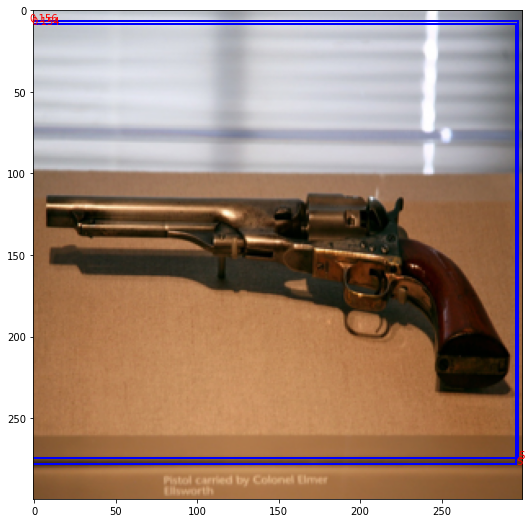

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

resized_width = 300  # we resized the original image, remember ? 
resized_height = 300
num_boxes = 2
boxes1 = box1_sorted[:num_boxes]
boxes2 = box2_sorted[:num_boxes]

def plot_box_and_confidence(img, boxes, scores_sorted, labels):
  plt.figure()
  fig, ax = plt.subplots(1, figsize=(12,9))
  ax.imshow(img)
  for i in range(len(boxes)):
    y1, x1, y2, x2 = boxes[i][0] * resized_height, boxes[i][1] * resized_width, boxes[i][2]* resized_height, boxes[i][3] * resized_width 
    color = 'blue'
    box_h = (y2 - y1)
    box_w = (x2 - x1)
    bbox = patches.Rectangle((y1,x1), box_h, box_w, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(bbox)
    ax.text(y1, x1, '%.3f' %scores_sorted[i], color='red')
    ax.text(y2, x2, labels[i], color='red')
  plt.show()
plot_box_and_confidence(img1, boxes1, scores1_sorted, labels_1)


<Figure size 432x288 with 0 Axes>

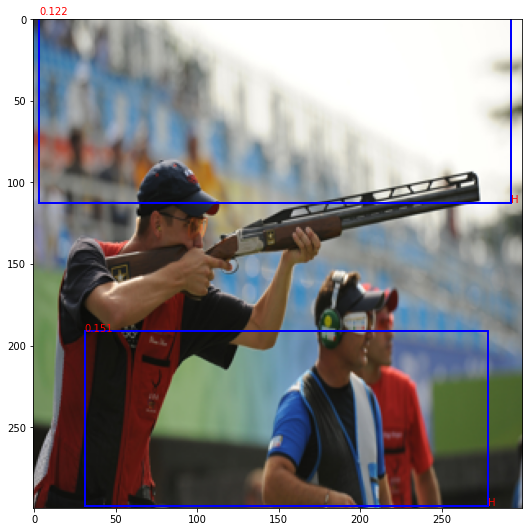

In [ ]:
plot_box_and_confidence(img2, boxes2, scores2_sorted, labels_2)

## Problem 5 - ML Cloud Platforms

In this question you will analyze different ML cloud platforms and compare their service offerings. In particular, you will consider ML cloud offerings from IBM, Google, Microsoft, and Amazon and compare them on the basis of following criteria:

1. Frameworks: DL framework(s) supported and their version. (4)
Here we are referring to machine learning platforms which have their own inbuilt images for different frameworks.
2. Compute units: type(s) of compute units offered, i.e., GPU types. (1)
3. Model lifecycle management: tools supported to manage ML model lifecycle. (2)
4. Monitoring: availability of application logs and resource (GPU, CPU, memory) usage monitoring data to the user. (2)
5. Visualization during training: performance metrics like accuracy and throughput (2)
6. Training job description: training job description file format. Show how the same training job is specified in different ML platforms. Identify similar fields in the training job file for the 4 ML platforms through an example. (4)

See the attached excel file.

## Problem 6 - Sentiment Analysis using recurrent models 

In this problem, you will compare the performance of RNN, LSTM, GRU and BiLSTM for the task of sentiment analysis. You’ll use the IMDB sentiment analysis dataset for this task - Sentiment Analysis of IMDB Movie Reviews. For each model, use a single cell, and keep the number of units fixed to 256. Train each model for 10 epochs using the Adam optimizer, batch size of 256, and a learning rate of 0.01.
1. Import the dataset and convert it into vector form using Bag of Words technique.


In [ ]:
import pandas as pd
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import numpy as np
import itertools
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = 'drive/MyDrive/ds301HW/IMDB Dataset.csv'
df = pd.read_csv(file_path)
df.sentiment = (df.sentiment == "positive").astype("int")


def train_val_test_split(df=None, train_percent=0.7, test_percent=0.15, val_percent=0.15):
  df = df.sample(frac=1)
  train_df = df[: int(len(df)*train_percent)]
  test_df = df[int(len(df)*train_percent)+1 : int(len(df)*(train_percent+test_percent))]
  val_df = df[int(len(df)*(train_percent + test_percent))+1 : ]
  return train_df, test_df, val_df

def process_tokens(text):
    """
    function to process tokens, replace any unwanted chars
    """
    preprocessed_text = text.lower().replace(",", "").replace(".", "").replace(":", "").replace(")", "").replace("-", "").replace("(", "")
    preprocessed_text = ''.join([i for i in preprocessed_text if not preprocessed_text.isdigit()])
    return preprocessed_text

def preprocessing(data):
    """
    preprocessing data to list of tokens
    """
    nlp = English()
    tokenizer = Tokenizer(nlp.vocab)
    preprocessed_data = []
    for sentence in data:
        sentence = process_tokens(sentence)
        tokens = tokenizer(sentence)
        tlist = []
        for token in tokens:
            tlist.append(str(token))
        preprocessed_data.append(tlist)
    return preprocessed_data

val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)
train_df, test_df, val_df = train_val_test_split(df, 0.7, 0.15, 0.15)
train_labels, train_texts = train_df.values[:,1], train_df.values[:,0]
val_labels, val_texts = val_df.values[:,1], val_df.values[:,0]
test_labels, test_texts = test_df.values[:,1], test_df.values[:,0]


train_data = preprocessing(train_texts)
val_data = preprocessing(val_texts)
test_data = preprocessing(test_texts)



## Creating a vectorizer to vectorize text and create matrix of features
## Bag of words technique
class Vectorizer():
    def __init__(self, max_features):
        self.max_features = max_features
        self.vocab_list = None
        self.token_to_index = None

    def fit(self, dataset):
        word_dict = {}
        for sentence in dataset:
            for token in sentence:
                if token not in word_dict:
                    word_dict[token] = 1
                else:
                    word_dict[token] += 1
        word_dict = dict(sorted(word_dict.items(), key=lambda item: item[1], reverse=True))
        end_to_slice = min(len(word_dict), self.max_features)
        word_dict = dict(itertools.islice(word_dict.items(), end_to_slice))
        self.vocab_list = list(word_dict.keys())
        self.token_to_index = {}
        counter = 0
        for token in self.vocab_list:
            self.token_to_index[token] = counter
            counter += 1


    def transform(self, dataset):
        data_matrix = np.zeros((len(dataset), len(self.vocab_list)))
        for i, sentence in enumerate(dataset):
            for token in sentence:
                if token in self.token_to_index:
                    data_matrix[i, self.token_to_index[token]] += 1
        return data_matrix

## max features - top k words to consider only
max_features = 2000 

vectorizer = Vectorizer(max_features=max_features)
vectorizer.fit(train_data)

## Checking if the len of vocab = k 
X_train = vectorizer.transform(train_data)
X_val = vectorizer.transform(val_data)
X_test = vectorizer.transform(test_data)

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

vocab = vectorizer.vocab_list

y_train = y_train.astype('int')
y_val = y_val.astype('int')
y_test = y_test.astype('int')


y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)

X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_val = X_val.reshape(-1, 1, X_val.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

y_train = y_train.reshape(-1, 2)
y_val = y_val.reshape(-1, 2)
y_test = y_test.reshape(-1, 2)

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')

X_train.shape: (35000, 1, 2000), y_train.shape: (35000, 2)


2. Define an RNN model and train it on the dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam

model = None
model = Sequential()
model.add(SimpleRNN(256, input_shape=(1, max_features)))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=10)
print(history.history.keys())
rnn_loss, rnn_accuracy = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               577792    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 578,306
Trainable params: 578,306
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
137/137 [==============================] - 5s 9ms/step - loss: 0.4843 - accuracy: 0.8175 - val_loss: 0.2952 - val_accuracy: 0.8755
Epoch 2/10
137/137 [==============================] - 1s 6ms/step - loss: 0.2676 - accuracy: 0.8876 - val_loss: 0.3006 - val_accuracy: 0.8780
Epoch 3/10
137/137 [==============================] - 1s 6ms/step - loss: 0.2285 - accuracy: 0.9054 - val_loss: 0.3355 - val_accuracy: 0.8684
Epoch 4/10
137/

3. Define a LSTM model and train it on the dataset

In [ ]:
from tensorflow.keras.layers import LSTM

model = None
model = Sequential()
model.add(LSTM(256, input_shape=(1, max_features)))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=10)
print(history.history.keys())
lstm_loss, lstm_accuracy = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               2311168   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2,311,682
Trainable params: 2,311,682
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
137/137 [==============================] - 5s 11ms/step - loss: 0.3560 - accuracy: 0.8440 - val_loss: 0.3032 - val_accuracy: 0.8760
Epoch 2/10
137/137 [==============================] - 1s 7ms/step - loss: 0.2606 - accuracy: 0.8892 - val_loss: 0.3033 - val_accuracy: 0.8767
Epoch 3/10
137/137 [==============================] - 1s 7ms/step - loss: 0.2094 - accuracy: 0.9160 - val_loss: 0.3172 - val_accuracy: 0.8734
Epoch 4/

4. Define a GRU model and train it on the dataset 

In [ ]:
from tensorflow.keras.layers import GRU

model = None
model = Sequential()
model.add(GRU(256, input_shape=(1, max_features)))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=10)
print(history.history.keys())
gru_loss, gru_accuracy = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               1734144   
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 1,734,658
Trainable params: 1,734,658
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
137/137 [==============================] - 3s 12ms/step - loss: 0.4182 - accuracy: 0.8214 - val_loss: 0.3032 - val_accuracy: 0.8748
Epoch 2/10
137/137 [==============================] - 1s 8ms/step - loss: 0.2670 - accuracy: 0.8890 - val_loss: 0.3085 - val_accuracy: 0.8709
Epoch 3/10
137/137 [==============================] - 1s 8ms/step - loss: 0.2341 - accuracy: 0.9039 - val_loss: 0.3127 - val_accuracy: 0.8763
Epoch 4/

5. Define a BiLSTM model and train it on the dataset 

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = None
model = Sequential()
model.add(Bidirectional(LSTM(256, input_shape=(1, max_features))))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
#print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=10)
print(history.history.keys())
bilstm_loss, bilstm_accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
137/137 [==============================] - 6s 18ms/step - loss: 0.3587 - accuracy: 0.8398 - val_loss: 0.3043 - val_accuracy: 0.8737
Epoch 2/10
137/137 [==============================] - 1s 9ms/step - loss: 0.2583 - accuracy: 0.8917 - val_loss: 0.2940 - val_accuracy: 0.8787
Epoch 3/10
137/137 [==============================] - 1s 9ms/step - loss: 0.2089 - accuracy: 0.9136 - val_loss: 0.3215 - val_accuracy: 0.8697
Epoch 4/10
137/137 [==============================] - 1s 9ms/step - loss: 0.1515 - accuracy: 0.9408 - val_loss: 0.3631 - val_accuracy: 0.8678
Epoch 5/10
137/137 [==============================] - 1s 9ms/step - loss: 0.0822 - accuracy: 0.9719 - val_loss: 0.4009 - val_accuracy: 0.8672
Epoch 6/10
137/137 [==============================] - 1s 9ms/step - loss: 0.0426 - accuracy: 0.9881 - val_loss: 0.4591 - val_accuracy: 0.8665
Epoch 7/10
137/137 [==============================] - 2s 11ms/step - loss: 0.0203 - accuracy: 0.9958 - val_loss: 0.5110 - val_accuracy: 0.8690
Epoc

6. Compare the performance of all the models. In which case do you get the best accuracy?

In [ ]:
print(f'RNN: {rnn_loss},{rnn_accuracy}')
print(f'LSTM: {lstm_loss},{lstm_accuracy}')
print(f'GRU: {gru_loss},{gru_accuracy}')
print(f'bilitm: {bilstm_loss},{bilstm_accuracy}')

RNN: 0.5139228105545044,0.8734498023986816
LSTM: 0.5710782408714294,0.8751833438873291
GRU: 0.5471852421760559,0.8699826598167419
bilitm: 0.5747465491294861,0.875450074672699


The bidirection LSTM model achieves the best test accuracy.